# Analisis Kompetensi Auditor

## Business Problem Understanding

**Context** 

Pusbin JFA sebagai unit kerja yang bertanggung jawab terhadap pembinaan Jabatan Fungsional Auditor yang merepresentasikan fungsi BPKP sebagai instansi pembina JFA memiliki tugas dan fungsi untuk mendukung tercapainya visi Menjadi Auditor Internal Pemerintah Berkelas Dunia dan Trusted Advisor Pemerintah untuk meningkatkan Good Governance Sektor Publik. Untuk meningkatkan profesionalisme auditor internal pemerintah untuk peningkatan kapabilitas APIP diperlukan auditor yang dapat melaksanakan tugas-tugas pengawasan yang sesuai dengan standar profesi dan berkinerja dengan efisien dan efektif. Oleh karena itu, Pusbin JFA sebagai pusat pengembangan kompetensi auditor intern pemerintah indonesia perlu mengetahui kompetensi auditor saat ini dibandingkan dengan standar kompetensi auditor dan kompetensi yang dibutuhkan saat ini. Dengan mengetahui data kompetensi masing-masing auditor, dapat diketahui apakah auditor saat ini telah kompeten dalam menjalankan tugasnya sebagai auditor intern pemerintah atau belum sehingga dapat dijadikan masukan dalam pengembangan profesi auditor maupun kalender pelaksanaan diklat yang akan dilaksanakan. Informasi terkait kompetensi diperoleh dari data aplikasi Sibijak sedangkan terkait diklat diperoleh dari data diklat Pusdiklatwas BPKP.

**Problem Statement :**

Dalam melaksanakan tugas dan wewenangnya, seorang auditor internal dituntut untuk dapat bekerja secara profesional sehingga kualitas hasil kerja yang dihasilkan akan semakin tinggi. Untuk dapat bekerja secara profesional, seorang auditor internal harus memiliki pengetahuan, pelatihan, keterampilan, dan pengalaman yang memadai agar bisa menyelesaikan pekerjaannya. Kriteria kompetensi auditor internal diperoleh melalui pendidikan, pengembangan profesional berkelanjutan, dan pengalaman kerja.
Jika seorang auditor internal melaksanakan penugasan tanpa didukung kompetensi yang memadai, maka terdapat kemungkinan kualitas hasil kerja tidak akan maksimal. Jika hal tersebut terjadi maka terdapat kemungkinan hasil kerja tersebut menyebabkan kesalahan atau ketidaktepatan dalam pengambilan keputusan yang dilakukan oleh pengguna laporan hasil kerja tersebut.

**Goals :**

Maka berdasarkan permasalahan tersebut, Pusbin JFA selaku unit kerja di BPKP yang bertanggungjawab atas pembinaan auditor internal pemerintah harus dapat melihat peta kompetensi yang di miliki oleh auditor internal di seluruh APIP dan meyakini bahwa auditor internal tersebut telah memiliki kompetensi standar yang dibutuhkan dalam pelaksanaan pekerjaannya.

Selain itu, Pusbin JFA ingin mengetahui penyebab apa/faktor/variabel perbedaan antara standar kompetensi auditor yang ada dengan kompetensi yang dimiliki oleh auditor saat ini.

**Analytic Approach :**

Pendekatan analisis yang akan dilakukan bertujuan untuk menemukan pola kesesuaian antara penugasan dengan diklat kompetensi yang telah diperoleh oleh auditor. Hal tersebut dilakukan untuk melihat sejauh mana kesesuaian antara kompetensi dan penugasan.

In [1]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Data Preparation

Pada proyek kali ini, data yang digunakan adalah data pelatihan dan penugasan yang diajukan pada dupak auditor. 
Sumber data:
* Pelatihan/Diklat: Aplikasi SIMDIKLAT (Pusdiklatwas BPKP)
* Penugasan: Aplikasi SIBIJAK PPAK (Pusbin JFA BPKP)

Untuk menarik data Pelatihan, kita menggunakan endpoint khusus yang diberikan oleh tim pengembang SIMDIKLAT dan data penugasan kita ambil dari database SIBIJAK dengan menggunakan query mysql

## Data Penugasan

In [2]:
df_penugasan = pd.read_csv('data/jumlah_kegiatan_penugasan.csv')
df_penugasan.tail()

,NIP,nama,tahun,jenis_instansi,unit_kerja,periode_mulai,periode_akhir,kode jabatan,jabatan,pangkat,kegiatan_ak_id,kegiatan_ak_name,jumlah
39559,200110302021011001,Muhammad Fariz Rizanda,2021,BPKP,Badan Pengawasan Keuangan dan Pembangunan,1/2/2021,30/6/2022,APK,Auditor Pelaksana,Pengatur,AH002.001.049,Melaksanakan tugas-tugas pengawasan sederhana ...,2
39560,200110302021011001,Muhammad Fariz Rizanda,2021,BPKP,Badan Pengawasan Keuangan dan Pembangunan,1/2/2021,30/6/2022,APK,Auditor Pelaksana,Pengatur,AH002.001.037,Melaksanakan tugas-tugas pengawasan sederhana ...,2
39561,200110302021011001,Muhammad Fariz Rizanda,2021,BPKP,Badan Pengawasan Keuangan dan Pembangunan,1/2/2021,30/6/2022,APK,Auditor Pelaksana,Pengatur,AH002.001.043,Melaksanakan tugas-tugas pengawasan sederhana ...,2
39562,200110302021011001,Muhammad Fariz Rizanda,2021,BPKP,Badan Pengawasan Keuangan dan Pembangunan,1/2/2021,30/6/2022,APK,Auditor Pelaksana,Pengatur,AH002.001.031,Melaksanakan tugas-tugas pengawasan sederhana ...,3
39563,200110302021011001,Muhammad Fariz Rizanda,2021,BPKP,Badan Pengawasan Keuangan dan Pembangunan,1/2/2021,30/6/2022,APK,Auditor Pelaksana,Pengatur,AH002.001.028,Melaksanakan tugas-tugas pengawasan sederhana ...,2


Keterangan data:
* NIP : Nomor Induk Pegawai
* nama : nama lengkap 
* jenis instansi: jenis instansi auditor (BPKP/KL/PEMDA)
* unit kerja: unit kerja auditor
* tahun : tahun penyusunan dupak
* periode_mulai - periode selesai: periode penyusunan dupak
* jabatan : jabatan auditor 
* pangkat : pangkat (dalam pns)
* kegiatan_ak_id : id dari butir kegiatan yang dipilih
* kegiatan_ak_nama : deskripsi dari unsur kegiatan yang dipilih
* jumlah : jumlah penugasan yang dilaksanakan dalam periode tersebut

## Rerefensi Kegiatan

In [3]:
refKegiatan = pd.read_csv('data/r_kegiatan.csv')
refKegiatan.head()

,kegiatan_ak_id,kegiatan_ak_parent_id,kegiatan_ak_name
0,AH001,0,PENDIDIKAN
1,AH001.001,AH001,Pendidikan Sekolah dan memperoleh ijazah/gelar
2,AH001.001.001,AH001.001,Doktor (S3)
3,AH001.001.002,AH001.001,Pasca Sarjana (S2)
4,AH001.001.003,AH001.001,Sarjana (S1)/Diploma IV


Keterangan Data:
* kegiatan_ak_id: kode referensi unsur kegiatan
* kegiatan_ak_parent_id : kode parent unsur kegiatan
* kegitann_ak_name : deskripsi unsur kegiatan

unsur kegiatan yang akan dianalisi hanya unsur kegiatan pengawasan, sehingga kode parent yang digunakan nanti hanya **AH002**

## Data Pelatihan/Diklat

In [4]:
df_pesertaDiklat = pd.read_csv('data/t_pool_peserta_diklat_simdiklat.csv')
df_pesertaDiklat.head()

C:\Users\pusbi\AppData\Local\Temp\ipykernel_12640\433426443.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df_pesertaDiklat = pd.read_csv('data/t_pool_peserta_diklat_simdiklat.csv')


,pdID,pesertaID,pesertaNama,pesertaNIP,kaldikID,kaldikDesc,kaldikSesiID,namaKelas,kelasID,nomorSertifikat,...,sesiName,diklatID,diklatTypeID,foto,pesertaIdentitasID,stmpl,biayaID,biayaName,created_at,updated_at
0,10000,44401,Ichsanudin Eko Saputro,196710271993031001,20190453,Diklat Audit Investigatif di Lingkungan Itjen ...,1563,A,1590,2632.0,...,Tatap Muka,223304152,4,NaN,1,NaN,3,PNBP,6/9/2022 04:59:27,6/9/2022 04:59:27
1,100002,63663,Hartono,196811121988121001,20210187,Teknik Audit Berbantuan Komputer di Lingkungan...,2854,A,2712,75.0,...,Tatap Muka,223304421,4,http://registrasi.bpkp.go.id/simdiklat/assets/...,1,http://pusdiklatwas.bpkp.go.id/cert/640100002,3,PNBP,6/9/2022 07:41:34,6/9/2022 07:41:34
2,100007,82279,Dharmasta,197010312005011003,20210187,Teknik Audit Berbantuan Komputer di Lingkungan...,2854,A,2712,69.0,...,Tatap Muka,223304421,4,http://registrasi.bpkp.go.id/simdiklat/assets/...,1,http://pusdiklatwas.bpkp.go.id/cert/650100007,3,PNBP,6/9/2022 07:41:34,6/9/2022 07:41:34
3,10001,44402,Nur Sofiyah,196910131992032001,20190453,Diklat Audit Investigatif di Lingkungan Itjen ...,1563,A,1590,2638.0,...,Tatap Muka,223304152,4,NaN,1,NaN,3,PNBP,6/9/2022 04:59:27,6/9/2022 04:59:27
4,10002,44403,Aji Prasetiyo Pambudi,197001111988031001,20190453,Diklat Audit Investigatif di Lingkungan Itjen ...,1563,A,1590,2625.0,...,Tatap Muka,223304152,4,NaN,1,NaN,3,PNBP,6/9/2022 04:59:27,6/9/2022 04:59:27


Keterangan data:
* pdID : nomor identitas data
* pesertaId: nomor identitas peserta
* pesertaNama: Nama Lengkap Peserta
* pesertaNIP: nomor induk pegawai 
* kaldikID : id kalender diklat
* kaldikDecs : desrkripsi dari diklat yang diikuti
* kaldikSesiID : id sesi kalender diklat
* namaKelas : nama kelas peserta
* kelasID : id kelas peserta
* nomor Sertifikat : nomor sertifikat diklat
* SesiName : nama sesi
* diklatID : id diklat yang diikut
* diklatTypeID : id tipe diklat yang diikut
* foto : url foto peserta
* pesertaIdentitasID : id identitas peserta
* stmpl: url sertifikat
* biayaID : id biaya
* biayaName : biaya diklat
* created_at : tanggal dibuat
* updated_at : tanggal terakhir diperbarui

Data peserta diklat ini, didapatkan melalui aplikasi SIMDIKLAT Pusdiklatwas BPKP
Dari semua data yang diambil, data yang akan dianalisis hanya data yang tipe diklatnya TS APIP, TS SPIP, Sertifikasi Non JFA, Mircro Learning dan MOOC

## Data Referensi Diklat/Pelatihan

In [5]:
refDiklatType = pd.read_csv('data/len_diklat_type.csv', sep=';')
refDiklatType

,diklatTypeID,diklatTypeName,bidangID,subbid_id,addDate,lastUpdate,addBy,updateBy
0,1,Fungsional Auditor,4,NaN,1.469629e+09,1.469629e+09,1.0,1.0
1,2,TS SPIP,3,31.0,1.469629e+09,1.469629e+09,1.0,1.0
2,3,Kedinasan,3,32.0,1.469629e+09,1.469629e+09,1.0,1.0
3,4,TS APIP,4,NaN,1.469629e+09,1.469629e+09,1.0,1.0
4,5,Manajerial,3,32.0,1.469629e+09,1.469629e+09,1.0,1.0
5,6,Sertifikasi Non JFA,3,33.0,1.469629e+09,1.469629e+09,1.0,1.0
6,8,Micro Learning,3,NaN,NaN,NaN,NaN,NaN
7,7,MOOC,3,NaN,NaN,NaN,NaN,NaN


Keterangan Data:
* diklatTypeID: id tipe diklat
* diklatTypeName:
* bidangID: id bidang penanggungjawab
* subbid_id: id sub-bidang penanggungjawab

data **bidangID** dan **subbid_id** dapat kita abaikan

In [6]:
refDiklat = pd.read_csv('data/len_diklat.csv', sep=';')
refDiklat.head()

,diklatID,diklatName,diklatTypeID,kurikulumID,addDate,lastUpdate,addBy,updateBy,kd_jenjang
0,253,Qualified Internal Auditor (QIA) STAR BPKP,2,0.0,1.496120e+09,1.496120e+09,1.0,1.0,NaN
1,254,Pengembangan Sekretaris,2,0.0,1.496120e+09,1.496120e+09,1.0,1.0,NaN
2,255,Audit Pengadaan Barang dan Jasa dengan Probity...,4,0.0,1.496120e+09,1.496120e+09,1.0,1.0,NaN
3,256,Pengelolaan Keuangan Daerah,2,0.0,1.496120e+09,1.496120e+09,1.0,1.0,NaN
4,258,Pengelolaan Badan Layanan Umum Daerah (BLUD),2,0.0,1.496120e+09,1.496120e+09,1.0,1.0,NaN


Keterangan Data:
* diklatID: id diklat
* diklatName: nama diklat
* diklatTypeID: id tipe diklat
* kurikulumID: id kurikulum

data **kurikulumID** dapat diabaikan

# Reviu dan *Cleansing Data*

## Data Penugasan dan Referensi Penugasan

In [7]:
## data referensi yang digunakan hanya yang id nya diawali AH002
## karena ini merupakan referensi data pengawasan (tugas utama auditor)
## berdasarkan hasil diskusi, data yang digunakan akan diquery ulang agar dapat sesuai dengan kebutuhan analisis
## serta dilakukan mapping kompetensi agar dapat disambungkan antara data penugasan dan data pelatihan
keg_pengawasan = refKegiatan[refKegiatan['kegiatan_ak_id'].str.contains('AH002')]
keg_pengawasan

,kegiatan_ak_id,kegiatan_ak_parent_id,kegiatan_ak_name
16,AH002,0,PENGAWASAN
17,AH002.001,AH002,"Pelaksana Kegiatan Teknis Pengawasan, Per Jam"
18,AH002.001.001,AH002.001,Melaksanakan tugas-tugas pengawasan dengan kom...
19,AH002.001.002,AH002.001,Memimpin pelaksanaan suatu penugasan audit kin...
20,AH002.001.003,AH002.001,Melaksanakan tugas-tugas pengawasan dengan kom...
...,...,...,...
127,AH002.002.003,AH002.002,Membantu melaksanakan kegiatan perencanaan dan...
128,AH002.002.004,AH002.002,Melakukan kegiatan Quality Assurance (QA) atas...
129,AH002.003,AH002,Pelaksanaan kegiatan perencanaan dan evaluasi ...
130,AH002.003.001,AH002.003,Melaksanakan kegiatan perencanaan pengawasan.


## Data Peserta Diklat dan Referensi Diklat

In [8]:
refDiklat.head()

,diklatID,diklatName,diklatTypeID,kurikulumID,addDate,lastUpdate,addBy,updateBy,kd_jenjang
0,253,Qualified Internal Auditor (QIA) STAR BPKP,2,0.0,1.496120e+09,1.496120e+09,1.0,1.0,NaN
1,254,Pengembangan Sekretaris,2,0.0,1.496120e+09,1.496120e+09,1.0,1.0,NaN
2,255,Audit Pengadaan Barang dan Jasa dengan Probity...,4,0.0,1.496120e+09,1.496120e+09,1.0,1.0,NaN
3,256,Pengelolaan Keuangan Daerah,2,0.0,1.496120e+09,1.496120e+09,1.0,1.0,NaN
4,258,Pengelolaan Badan Layanan Umum Daerah (BLUD),2,0.0,1.496120e+09,1.496120e+09,1.0,1.0,NaN


In [9]:
refDiklat.describe(include='object')

,diklatName
count,747
unique,744
top,<p>Kepemimpinan Tingkat III</p>\n
freq,2


Dari sini sebenarnya terdapat keanehan, yang dimana jumlah data yang unik tidak sama dengan total jumlah datanya. padahal ini merupakan data referensi. Mungkin akan dijadikan masukan kepada pemilik data agar memiliki referensi yang konsisten agar memudahkan dalam menganalisa datanya. Untuk data yang terduplikat ini tidak kita apa-apakan saat ini, karena bisa saja mengganggu referensi data peserta diklatnya

In [10]:
df_pesertaDiklat.describe(include='object')

,pesertaNama,pesertaNIP,kaldikDesc,namaKelas,tglBerlaku,nomorSertifikatLan,pesertaDegreeFirst,pesertaDegreeLast,pesertaPOB,pesertaDOB,...,pangkatName,jabatanFullName,startDateRealisasi,endDateRealisasi,sesiName,foto,stmpl,biayaName,created_at,updated_at
count,65518,65518,65518,27213,51228,620,2367,57034,46041,60116,...,65073,65518,65518,65518,65518,41435,27150,65518,65518,65518
unique,28235,27956,936,9,335,331,89,3612,3946,11578,...,45,106,359,440,3,29378,21623,5,70,66
top,Ismail,197507091995021001,Pelatihan MOOC Fundamental Good Corporate Gove...,A,18/11/2023 00:00:00,00004797/DIKLATPIM TK. III/4023/011/LAN-BPKP/2019,Drs.,S.E.,Jakarta,21/6/1990,...,Penata Muda Tingkat I,Auditor Pertama,3/5/2021 00:00:00,4/6/2021 00:00:00,Tatap Muka,http://registrasi.bpkp.go.id/simdiklat/assets/...,http://pusdiklatwas.bpkp.go.id/cert/930114367,PNBP,6/9/2022 04:59:27,6/9/2022 04:59:27
freq,27,18,3729,16395,968,7,558,17265,4959,341,...,13342,14924,3816,3758,45229,16,3,36803,1000,1000


In [11]:
df_pesertaDiklat.isna().sum()

pdID                       0
pesertaID                  0
pesertaNama                0
pesertaNIP                 0
kaldikID                   0
kaldikDesc                 0
kaldikSesiID               0
namaKelas              38305
kelasID                    0
nomorSertifikat        14289
tglBerlaku             14290
nomorSertifikatLan     64898
pangkatID                  0
jabatanGroupID          1471
pesertaDegreeFirst     63151
pesertaDegreeLast       8484
pesertaPOB             19477
pesertaDOB              5402
pesertaGender          18207
pesertaTelepon          7956
pesertaEmail            6487
pesertaKetUnitKerja    27153
pesertaKetJabatan      26401
pesertaKetPangkat      62608
GolRuang                3643
pangkatName              445
jabatanID                  0
jabatanFullName            0
unitID                     0
unitName               65518
kurikulumSesiID            0
startDateRealisasi         0
endDateRealisasi           0
sesiID                     0
sesiName      

dapat kita lihat terdapat banyak sekali missing value, kemungkinan data-data yang missing value akan didrop dan dicoba cari datanya di refernsi yang lain, terutama seperti unit kerja

Langkah berikutnya adalah menghubungkan data antara penugasan dan diklat yang telah didapatkan oleh seorang auditor
Untuk mempermudah analisa data yang dilakukan, data yang digunakan merupakan data penugasan tahun 2021 dan data diklat yang digunakan adalah data peserta diklat tahun 2019-2021.
Untuk menghubungkan data, kita perlu melakukan yang namanya mapping, dan mapping yang dilakukan itu menggunakan data kompetensi yang telah dibuat oleh Pusdiklatwas BPKP. Jadi disini kita akan mencocokan penugasan a masuk ke kompetensi mana, serta mencocokan pula diklat a masuk ke kompetensi mana, agar nanti dapat langsung dihubungkan antara referensi penugasan dengan referensi diklat

Untuk melakukan mapping ini kita akan lakukan diluar dari *notebook* ini, yaitu menggukana aplikasi *microsoft excel*

# Data Penugasan (After Mapping)

## Data Penugasan

Terdapat permasalahan pada saat melakukan mapping data penugasan, data referensi butir kegiatan tidak dapat digunakan dikarenakan terdapat butir kegiatan yang mencampur akademi yang berbeda kedalam 1 butir kegiatan. Hal mungkin disebabkan kegiatan-kegiatan tersebut memiliki bobot nilai yang sama, tetapi karena hal tersebut, penugasan yang diajukan sangat sulit diklasifikasikan. Sehingga kami memutuskan untuk melakukan mapping terhadap uraian kegiatan yang ditambahkan oleh Auditor yang mengajukan.
Untuk mempermudah pelaksanaan mapping dan analisis data, kami memutuskan untuk menggunakan data auditor BPKP yang diajukan pada tahun 2021

In [12]:
# Berikut data hasil mapping yang dilakukan
df_penugasan = pd.read_csv('data/penugasan+kompetensi.csv', sep=';',encoding='latin-1')
df_penugasan

,NIP,Judul Penugasan,Komptentsi,Kode_Kompetensi
0,195805141981011001,Rapat Monitoring dan Evaluasi Mingguan ke-3 Pe...,Akademi Kompetensi Umum,1
1,195907291980122001,Menghadiri ekspose PT Pupuk Indonesia (Pesero)...,Akademi Tata Kelola Koprorasi,5
2,195907291980122001,Rapat Evaluasi Penyelenggaraan Uji Kompetensi ...,Akademi Kompetensi Umum,1
3,195907291980122001,Rapat Persiapan Uji Makalah peserta Diklat CG...,Akademi Kompetensi Umum,1
4,195907291980122001,Melakukan Uji Makalah peserta Diklat CGCAE Bat...,Akademi Kompetensi Umum,1
...,...,...,...,...
12725,199007082012101002,mendampingi Sdri. Retno Dwijanti untuk memberi...,Akademi Akuntansi Forensik dan Investigasi,6
12726,199007082019022003,Kompilasi Hasil Audit Atas Pelaksanaan Vaksina...,Akademi Kompetensi Umum,1
12727,199007082019022003,Reviu Tata Kelola atas PSN pada Sertifikasi La...,Akademi Tata Kelola Perekonimian dan Kemaritiman,2
12728,199007082019022003,Reviu Tatakelola Proyek Strategis Nasional (PS...,Akademi Tata Kelola Perekonimian dan Kemaritiman,2


In [13]:
df_penugasan.isna().sum()

NIP                0
Judul Penugasan    0
Komptentsi         0
Kode_Kompetensi    0
dtype: int64

## Data Jumlah Kompetensi Penugasan

In [14]:
df_kompetensi_penugasan = pd.read_csv('data/kompetensi_penugasan-2021.csv')
df_kompetensi_penugasan

,nip,Akademi Kompetensi Umum,Akademi Tata Kelola Perekonimian dan Kemaritiman,Akademi Tata Kelola Polhukam PMK,Akademi Tata Kelola Pemerintahan Daerah dan Desa,Akademi Tata Kelola Koprorasi,Akademi Akuntansi Forensik dan Investigasi
0,195805141981011001,1,0,0,0,0,0
1,195907291980122001,16,0,0,0,1,0
2,195908071981121001,17,0,0,0,0,0
3,196004211985021001,13,0,0,0,0,0
4,196105051982092001,0,0,1,0,0,0
...,...,...,...,...,...,...,...
2505,199007072014021004,3,0,1,1,0,0
2506,199007072014032003,0,3,0,0,0,0
2507,199007082012101001,0,0,0,1,0,0
2508,199007082012101002,0,0,0,0,0,10


In [15]:
df_kompetensi_penugasan.isna().sum()

nip                                                 0
Akademi Kompetensi Umum                             0
Akademi Tata Kelola Perekonimian dan Kemaritiman    0
Akademi Tata Kelola Polhukam PMK                    0
Akademi Tata Kelola Pemerintahan Daerah dan Desa    0
Akademi Tata Kelola Koprorasi                       0
Akademi Akuntansi Forensik dan Investigasi          0
dtype: int64

Artinya ada sekitar 2510 Auditor BPKP yang mengajukan dupak pada tahun 2021 (Tetapi bukan berarti telah mengajukan dupak diseluruh periode tahun tersebut)

## Data Peserta Diklat

In [16]:
df_peserta_diklat = pd.read_csv('data/daftarpesertadiklat+kompetensi_baru.csv',sep=';')
df_peserta_diklat

,pesertaNIP,pesertaNama,jabatanFullName,UnitKerja_NamaUnitInstansi,Tahun,kaldikDesc,diklatID,diklatTypeID,diklatTypeName,diklatName,akademiID,akademi,biayaName,JumlahBiaya
0,195904271979112001,Sri Waningsih,Auditor Madya,Pusat Penelitian dan Pengembangan Pengawasan,2019,Diklat Indeks Akuntabilitas Pengelolaan Progra...,223304211,2,TS SPIP,Indeks Akuntabilitas Pengelolaan Program Pemba...,2,Akademi Tata Kelola Perekonimian dan Kemaritiman,Rupiah Murni Pusdiklatwas,5384000
1,196001241981121001,Aneko Rusdandi W.,Auditor Madya,Deputi Bidang Pengawasan Instansi Pemerintah B...,2019,"Penerapan, Penilaian, dan Reviu atas Pengendal...",223304223,2,TS SPIP,"Penerapan, Penilaian, dan Reviu atas Pengendal...",2,Akademi Tata Kelola Perekonimian dan Kemaritiman,Rupiah Murni Pusdiklatwas,5384000
2,196002171983021001,Khaerun,Auditor Madya,Perwakilan BPKP Provinsi Jawa Tengah,2019,TOT FOR IA-CM ASSESSORS BATCH 2 di Lingkungan ...,223304207,2,TS SPIP,TOT FOR IA-CM ASSESSORS BATCH 2,4,Akademi Tata Kelola Pemerintahan Daerah dan Desa,World Bank,6975000
3,196006011986032001,Rahmatin Al Baroroh,Auditor Madya,Deputi Bidang Pengawasan Instansi Pemerintah B...,2020,Manajemen Risiko Sektor Publik dan Pengukuran ...,223304343,4,TS APIP,Manajemen Risiko Sektor Publik dan <br> Penguk...,1,Akademi Kompetensi Umum,Rupiah Murni Pusdiklatwas,2053000
4,196006021982031001,Achmad Sujalma,Auditor Muda,Perwakilan BPKP Provinsi Jawa Barat,2019,TOT FOR IA-CM ASSESSORS BATCH 2 di Lingkungan ...,223304207,2,TS SPIP,TOT FOR IA-CM ASSESSORS BATCH 2,4,Akademi Tata Kelola Pemerintahan Daerah dan Desa,World Bank,6975000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12934,199810132019122001,Ananda Nurizkina,Auditor Pelaksana,Perwakilan BPKP Provinsi Kepulauan Riau,2021,Pelatihan MOOC Fundamental Good Corporate Gove...,223304483,7,MOOC,MOOC Fundamental Good Corporate Governance,5,Akademi Tata Kelola Koprorasi,Rupiah Murni Pusdiklatwas,27000
12935,199905192019121001,Daniel Parulian Simanjuntak,Auditor Pelaksana,Perwakilan BPKP Provinsi Sulawesi Tenggara,2021,Pelatihan MOOC Fundamental Good Corporate Gove...,223304483,7,MOOC,MOOC Fundamental Good Corporate Governance,5,Akademi Tata Kelola Koprorasi,Rupiah Murni Pusdiklatwas,27000
12936,199912152019121001,Muhammad Gumelar Wiriaatmadja,Auditor Pelaksana,Perwakilan BPKP Provinsi Papua,2021,MOOC Fundamental GCG Khusus Perwakilan BPKP Pr...,223304483,7,MOOC,MOOC Fundamental Good Corporate Governance,5,Akademi Tata Kelola Koprorasi,Rupiah Murni Pusdiklatwas,27000
12937,199912152019121001,Muhammad Gumelar Wiriaatmadja,Auditor Pelaksana,Perwakilan BPKP Provinsi Papua,2021,MOOC E-audit Dengan Aplikasi SIPACE MACE,223304512,7,MOOC,<i>Massive Open Online Course</i> (MOOC) <i>E-...,4,Akademi Tata Kelola Pemerintahan Daerah dan Desa,Rupiah Murni Pusdiklatwas,27000


## Data Jumlah Kompetensi Peserta Diklat

In [17]:
df_kompetensi_pesertadiklat = pd.read_csv('data/jumlahkompetensipesertadiklat.csv')
df_kompetensi_pesertadiklat

,pesertaNIP,pesertaNama,jabatanID,jabatanFullName,UnitKerja_NamaUnitInstansi,Jumlah Diklat,Akademi Kompetensi Umum,Akademi Tata Kelola Perekonimian dan Kemaritiman,Akademi Tata Kelola Polhukam PMK,Akademi Tata Kelola Pemerintahan Daerah dan Desa,Akademi Tata Kelola Koprorasi,Akademi Akuntansi Forensik dan Investigasi
0,195904271979112001,Sri Waningsih,39,Auditor Madya,Pusat Penelitian dan Pengembangan Pengawasan,1,0,1,0,0,0,0
1,196001241981121001,Aneko Rusdandi W.,39,Auditor Madya,Deputi Bidang Pengawasan Instansi Pemerintah B...,1,0,1,0,0,0,0
2,196002171983021001,Khaerun,39,Auditor Madya,Perwakilan BPKP Provinsi Jawa Tengah,1,0,0,0,1,0,0
3,196006011986032001,Rahmatin Al Baroroh,39,Auditor Madya,Deputi Bidang Pengawasan Instansi Pemerintah B...,1,1,0,0,0,0,0
4,196006021982031001,Achmad Sujalma,38,Auditor Muda,Perwakilan BPKP Provinsi Jawa Barat,2,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4103,199809132018121001,Rayhan Yuda Putra,36,Auditor Pelaksana,Perwakilan BPKP Provinsi Gorontalo,3,1,0,0,0,1,1
4104,199810132019122001,Ananda Nurizkina,36,Auditor Pelaksana,Perwakilan BPKP Provinsi Kepulauan Riau,1,0,0,0,0,1,0
4105,199905192019121001,Daniel Parulian Simanjuntak,36,Auditor Pelaksana,Perwakilan BPKP Provinsi Sulawesi Tenggara,1,0,0,0,0,1,0
4106,199912152019121001,Muhammad Gumelar Wiriaatmadja,36,Auditor Pelaksana,Perwakilan BPKP Provinsi Papua,2,0,0,0,1,1,0


# Analisis dan Visualisasi

In [18]:
df_peserta_diklat.head()

,pesertaNIP,pesertaNama,jabatanFullName,UnitKerja_NamaUnitInstansi,Tahun,kaldikDesc,diklatID,diklatTypeID,diklatTypeName,diklatName,akademiID,akademi,biayaName,JumlahBiaya
0,195904271979112001,Sri Waningsih,Auditor Madya,Pusat Penelitian dan Pengembangan Pengawasan,2019,Diklat Indeks Akuntabilitas Pengelolaan Progra...,223304211,2,TS SPIP,Indeks Akuntabilitas Pengelolaan Program Pemba...,2,Akademi Tata Kelola Perekonimian dan Kemaritiman,Rupiah Murni Pusdiklatwas,5384000
1,196001241981121001,Aneko Rusdandi W.,Auditor Madya,Deputi Bidang Pengawasan Instansi Pemerintah B...,2019,"Penerapan, Penilaian, dan Reviu atas Pengendal...",223304223,2,TS SPIP,"Penerapan, Penilaian, dan Reviu atas Pengendal...",2,Akademi Tata Kelola Perekonimian dan Kemaritiman,Rupiah Murni Pusdiklatwas,5384000
2,196002171983021001,Khaerun,Auditor Madya,Perwakilan BPKP Provinsi Jawa Tengah,2019,TOT FOR IA-CM ASSESSORS BATCH 2 di Lingkungan ...,223304207,2,TS SPIP,TOT FOR IA-CM ASSESSORS BATCH 2,4,Akademi Tata Kelola Pemerintahan Daerah dan Desa,World Bank,6975000
3,196006011986032001,Rahmatin Al Baroroh,Auditor Madya,Deputi Bidang Pengawasan Instansi Pemerintah B...,2020,Manajemen Risiko Sektor Publik dan Pengukuran ...,223304343,4,TS APIP,Manajemen Risiko Sektor Publik dan <br> Penguk...,1,Akademi Kompetensi Umum,Rupiah Murni Pusdiklatwas,2053000
4,196006021982031001,Achmad Sujalma,Auditor Muda,Perwakilan BPKP Provinsi Jawa Barat,2019,TOT FOR IA-CM ASSESSORS BATCH 2 di Lingkungan ...,223304207,2,TS SPIP,TOT FOR IA-CM ASSESSORS BATCH 2,4,Akademi Tata Kelola Pemerintahan Daerah dan Desa,World Bank,6975000


In [19]:
df_peserta_diklat.info() # informasi data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12939 entries, 0 to 12938
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   pesertaNIP                  12939 non-null  int64 
 1   pesertaNama                 12939 non-null  object
 2   jabatanFullName             12939 non-null  object
 3   UnitKerja_NamaUnitInstansi  12939 non-null  object
 4   Tahun                       12939 non-null  int64 
 5   kaldikDesc                  12939 non-null  object
 6   diklatID                    12939 non-null  int64 
 7   diklatTypeID                12939 non-null  int64 
 8   diklatTypeName              12939 non-null  object
 9   diklatName                  12939 non-null  object
 10  akademiID                   12939 non-null  int64 
 11  akademi                     12939 non-null  object
 12  biayaName                   12939 non-null  object
 13  JumlahBiaya                 12939 non-null  in

In [20]:
## kita perlu mengubah tipe data nip dari int menjadi str dan JumlahBiaya dari str menjadi int
df_peserta_diklat['pesertaNIP'] = df_peserta_diklat['pesertaNIP'].astype(str)

In [21]:
df_peserta_diklat['UnitKerja_NamaUnitInstansi'].unique()

array(['Pusat Penelitian dan Pengembangan Pengawasan',
       'Deputi Bidang Pengawasan Instansi Pemerintah Bidang Politik, Hukum, Keamanan, Pembangunan Manusia dan Kebudayaan',
       'Perwakilan BPKP Provinsi Jawa Tengah',
       'Perwakilan BPKP Provinsi Jawa Barat',
       'Deputi Bidang Administrasi', 'Inspektorat BPKP',
       'Sekretariat Utama Badan Pengawasan Keuangan dan Pembangunan',
       'Deputi Bidang Investigasi',
       'Perwakilan BPKP Provinsi Sumatera Selatan',
       'Perwakilan BPKP Provinsi Jawa Timur',
       'Perwakilan BPKP Provinsi Kalimantan Timur',
       'Deputi Bidang Pengawasan Penyelenggaraan Keuangan Daerah',
       'Deputi Bidang Pengawasan Instansi Pemerintah Bidang Perekonomian dan Kemaritiman',
       'Perwakilan BPKP Provinsi Sulawesi Tengah',
       'Perwakilan BPKP Provinsi Sulawesi Selatan',
       'Perwakilan BPKP Provinsi Sumatera Utara',
       'Perwakilan BPKP Provinsi Daerah Khusus Ibukota Jakarta',
       'Pusat Pembinaan Jabatan Fungsion

In [22]:
dataDiklat1 = df_peserta_diklat.groupby(['akademi','Tahun','diklatTypeID']).agg({'pesertaNIP':'count','JumlahBiaya':'sum'})
dataDiklat1

pesertaNIP  \
akademi                                          Tahun diklatTypeID               
Akademi Akuntansi Forensik dan Investigasi       2019  2                     42   
                                                       4                    102   
                                                 2020  2                     97   
                                                       4                    227   
                                                       7                   3591   
                                                 2021  2                    137   
                                                       6                    220   
Akademi Kompetensi Umum                          2019  2                    503   
                                                       6                     96   
                                                       7                      1   
                                                 2020  2                    551   
                                                       4                    287   
                                                       6                     84   
                                                       7                    180   
                                                 2021  2                    326   
                                                       4                     68   
                                                       6                    444   
Akademi Tata Kelola Koprorasi                    2019  2                     69   
                                                       4                     33   
                                                 2020  2                     34   
                                                       4                    118   
                                                 2021  2                    221   
                                                       4                     34   
                                                       7                   3537   
Akademi Tata Kelola Pemerintahan Daerah dan Desa 2019  2                    203   
                                                 2020  2                     85   
                                                       4                    165   
                                                 2021  2                     13   
                                                       4                    268   
                                                       6                     44   
                                                       7                    538   
Akademi Tata Kelola Perekonimian dan Kemaritiman 2019  2                    162   
                                                 2020  2                     31   
                                                       4                    188   
                                                 2021  2                     40   
Akademi Tata Kelola Polhukam PMK                 2020  2                     65   
                                                       4                     50   
                                                 2021  2                     85   

                                                                     JumlahBiaya  
akademi                                          Tahun diklatTypeID               
Akademi Akuntansi Forensik dan Investigasi       2019  2               183272000  
                                                       4               549168000  
                                                 2020  2                 2619000  
                                                       4                 8155000  
                                                       7                       0  
                                                 2021  2               992154000  
                                                       6              2486000000  
A

In [23]:
df_peserta_diklat['akademi'].unique()

array(['Akademi Tata Kelola Perekonimian dan Kemaritiman',
       'Akademi Tata Kelola Pemerintahan Daerah dan Desa',
       'Akademi Kompetensi Umum',
       'Akademi Akuntansi Forensik dan Investigasi',
       'Akademi Tata Kelola Koprorasi',
       'Akademi Tata Kelola Polhukam PMK'], dtype=object)

C:\Users\pusbi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


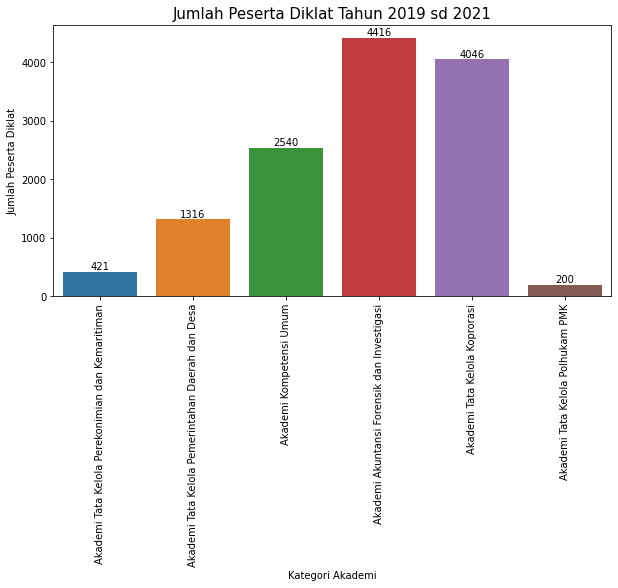

In [24]:
# Jumlah total peserta Diklat per kompetensi tahun 2019-2021
plt.figure(figsize = (10,5))
ax= sns.countplot(df_peserta_diklat['akademi'])
ax.bar_label(ax.containers[0])
ax.set_title("Jumlah Peserta Diklat Tahun 2019 sd 2021",size=15)
plt.xlabel('Kategori Akademi')
plt.ylabel('Jumlah Peserta Diklat')
plt.xticks(rotation='vertical')
plt.show()

C:\Users\pusbi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


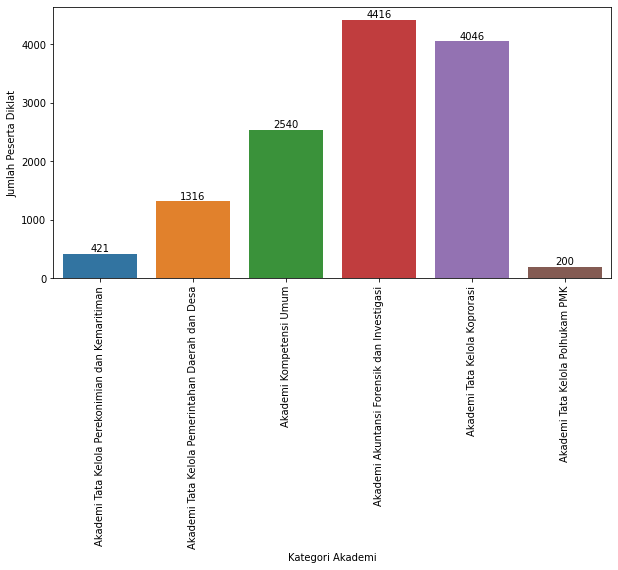

In [25]:
# Jumlah total peserta Diklat per Jenis Diklat tahun 2019-2021
plt.figure(figsize = (10,5))
ax= sns.countplot(df_peserta_diklat['akademi'])
ax.bar_label(ax.containers[0])
plt.xlabel('Kategori Akademi')
plt.ylabel('Jumlah Peserta Diklat')
plt.xticks(rotation='vertical')
plt.show()

In [26]:
dataDiklat2 = df_peserta_diklat.groupby(['diklatTypeID']).agg({'pesertaNIP':'count','JumlahBiaya':'sum'}).reset_index()
dataDiklat2

,diklatTypeID,pesertaNIP,JumlahBiaya
0,2,2664,10189794000
1,4,1540,3448507000
2,6,888,8208826000
3,7,7847,115409000


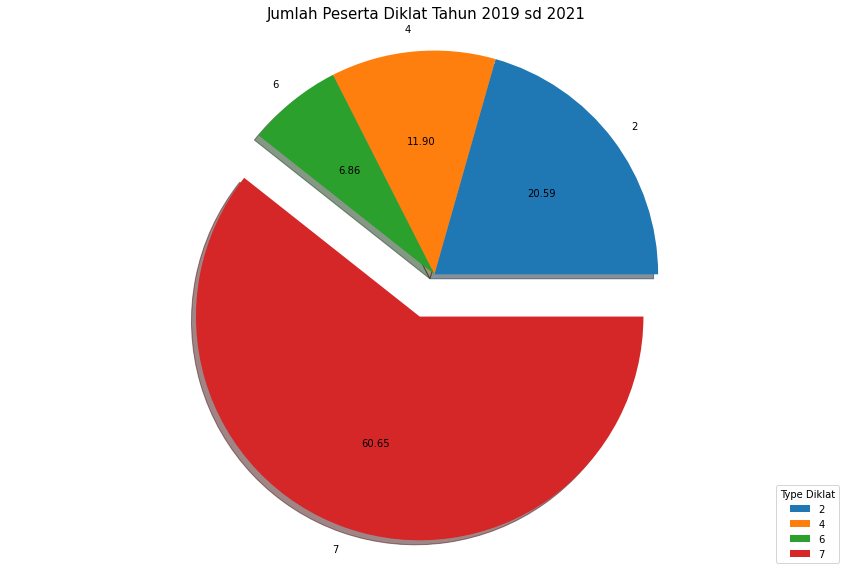

In [27]:
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw=dict(aspect="equal"))
plt.pie(dataDiklat2['pesertaNIP'], #jumlah data per bagian
        labels=dataDiklat2['diklatTypeID'], #label untuk tiap bagian
        autopct='%.2f', #memberi label nilai propirsi, dalam persen
        explode=(0,0,0,0.2,), # memberi jarak antar slice, bisa dipakai untuk menonjolkan slice tertentu
        shadow='True'
       ) 
plt.axis('equal') #posisi poe chart ditengah canvas
plt.legend(loc='lower right', title='Type Diklat')
ax.set_title("Jumlah Peserta Diklat Tahun 2019 sd 2021",size=15)
plt.show()

Hasil Analisis:
Pelaksanaan Diklat pada tahun 2019 sampai dengan 2022 yang dilakukan oleh Pusdiklatwas BPKP telah dilakukan pada semua akademi dengan Akademi Akuntansi Forensik dan Investigasi yang memiliki persentase peserta paling banyak. 
Dari data tersebut, dapat dilihat bahwa Akademi Akuntansi Forensik dan Investigasi menyelenggarakan kegiatan MOOC yang memiliki jumlah peserta paling banyak

In [28]:
df1 = df_peserta_diklat.groupby(['akademi','Tahun','diklatTypeID']).agg({'pesertaNIP':'count','JumlahBiaya':'sum'}).reset_index()
df1

,akademi,Tahun,diklatTypeID,pesertaNIP,JumlahBiaya
0,Akademi Akuntansi Forensik dan Investigasi,2019,2,42,183272000
1,Akademi Akuntansi Forensik dan Investigasi,2019,4,102,549168000
2,Akademi Akuntansi Forensik dan Investigasi,2020,2,97,2619000
3,Akademi Akuntansi Forensik dan Investigasi,2020,4,227,8155000
4,Akademi Akuntansi Forensik dan Investigasi,2020,7,3591,0
5,Akademi Akuntansi Forensik dan Investigasi,2021,2,137,992154000
6,Akademi Akuntansi Forensik dan Investigasi,2021,6,220,2486000000
7,Akademi Kompetensi Umum,2019,2,503,2035196000
8,Akademi Kompetensi Umum,2019,6,96,206158000
9,Akademi Kompetensi Umum,2019,7,1,5384000


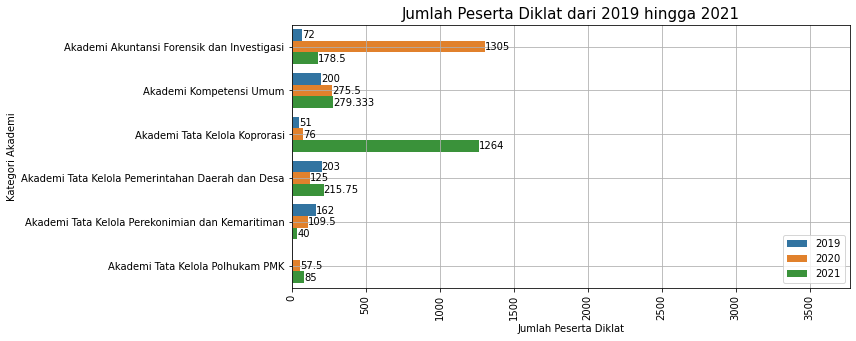

In [29]:
#1
plt.figure(figsize=(10,5))
ax=sns.barplot(y = df1['akademi'],
            x = df1['pesertaNIP'],
            hue = 'Tahun',
            errwidth=0,
            data = df1)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.xticks(rotation='vertical')
plt.subplots_adjust(bottom = 0.15)

plt.legend(loc='lower right')
plt.title('Jumlah Peserta Diklat dari 2019 hingga 2021', size=15)
plt.grid(True)
plt.ylabel('Kategori Akademi')
plt.xlabel('Jumlah Peserta Diklat')
plt.show()

In [30]:
df1.groupby(['akademi','JumlahBiaya'])['Tahun'].sum()

akademi                                           JumlahBiaya
Akademi Akuntansi Forensik dan Investigasi        0              2020
                                                  2619000        2020
                                                  8155000        2020
                                                  183272000      2019
                                                  549168000      2019
                                                  992154000      2021
                                                  2486000000     2021
Akademi Kompetensi Umum                           0              2020
                                                  2268000        2020
                                                  5384000        2019
                                                  15853000       2020
                                                  22981000       2020
                                                  206158000      2019
                            

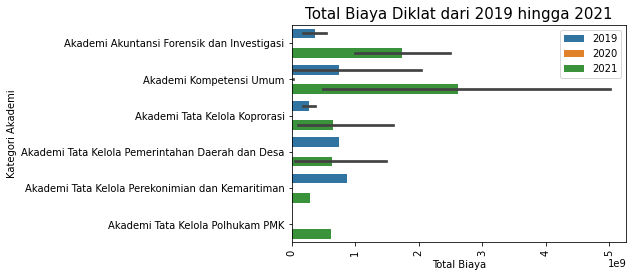

In [31]:
#2
ax=sns.barplot(y = df1['akademi'],
            x = df1['JumlahBiaya'],
            hue = 'Tahun',
            data = df1)
# ax.bar_label(ax.containers[0])
# ax.bar_label(ax.containers[1])
# ax.bar_label(ax.containers[2])
plt.legend(loc=0)
plt.title("Total Biaya Diklat dari 2019 hingga 2021",size=15)
plt.ylabel('Kategori Akademi')
plt.xlabel('Total Biaya')
plt.xticks(rotation='vertical')
plt.show()

In [32]:
df2=df_peserta_diklat.groupby(['biayaName','Tahun','akademi']).agg({'pesertaNIP':'count','JumlahBiaya':'sum'}).reset_index()
df2

,biayaName,Tahun,akademi,pesertaNIP,JumlahBiaya
0,PNBP,2020,Akademi Kompetensi Umum,25,675000
1,PNBP,2021,Akademi Kompetensi Umum,1,7242000
2,PNBP,2021,Akademi Tata Kelola Pemerintahan Daerah dan Desa,1,7242000
3,Rupiah Murni Kantor Pusat,2020,Akademi Kompetensi Umum,32,864000
4,Rupiah Murni Pusdiklatwas,2019,Akademi Akuntansi Forensik dan Investigasi,136,732224000
5,Rupiah Murni Pusdiklatwas,2019,Akademi Kompetensi Umum,416,2239744000
6,Rupiah Murni Pusdiklatwas,2019,Akademi Tata Kelola Koprorasi,102,549168000
7,Rupiah Murni Pusdiklatwas,2019,Akademi Tata Kelola Pemerintahan Daerah dan Desa,134,721456000
8,Rupiah Murni Pusdiklatwas,2019,Akademi Tata Kelola Perekonimian dan Kemaritiman,162,872208000
9,Rupiah Murni Pusdiklatwas,2020,Akademi Akuntansi Forensik dan Investigasi,3915,10774000


In [33]:
df3=df_peserta_diklat.groupby(['biayaName','Tahun']).agg({'pesertaNIP':'count','JumlahBiaya':'sum'}).reset_index()
df3

,biayaName,Tahun,pesertaNIP,JumlahBiaya
0,PNBP,2020,25,675000
1,PNBP,2021,2,14484000
2,Rupiah Murni Kantor Pusat,2020,32,864000
3,Rupiah Murni Pusdiklatwas,2019,950,5114800000
4,Rupiah Murni Pusdiklatwas,2020,5686,76017000
5,Rupiah Murni Pusdiklatwas,2021,4075,110025000
6,STAR,2019,192,7210000
7,STAR,2020,10,270000
8,STAR,2021,1898,16618380000
9,World Bank,2019,69,19811000


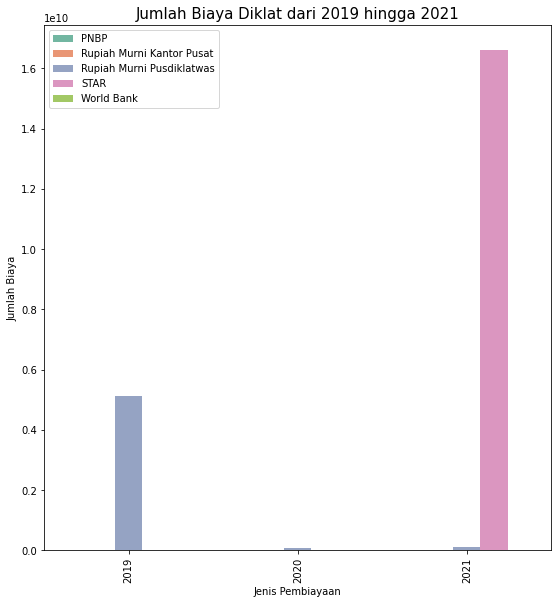

In [34]:
#3
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
# ax= sns.barplot(data=df2, x=df2['biayaName'], y=df2['JumlahBiaya'], errwidth=0, hue='TAHUN', palette='Set2')
# ax.bar_label(ax.containers[0])
ax=sns.barplot(x = df3['Tahun'],
            y = df3['JumlahBiaya'],
            errwidth=0,
            hue = 'biayaName',
            palette='Set2',
            data = df3)
plt.subplots_adjust(bottom = 0.15)

plt.legend(loc=2)
plt.title('Jumlah Biaya Diklat dari 2019 hingga 2021',size=15)
plt.ylabel('Jumlah Biaya')
plt.xlabel('Jenis Pembiayaan')
plt.xticks(rotation='vertical')
plt.show()

In [35]:
df4=df_peserta_diklat.groupby(['biayaName',]).agg({'JumlahBiaya':'sum'}).reset_index()
df4

,biayaName,JumlahBiaya
0,PNBP,15159000
1,Rupiah Murni Kantor Pusat,864000
2,Rupiah Murni Pusdiklatwas,5300842000
3,STAR,16625860000
4,World Bank,19811000


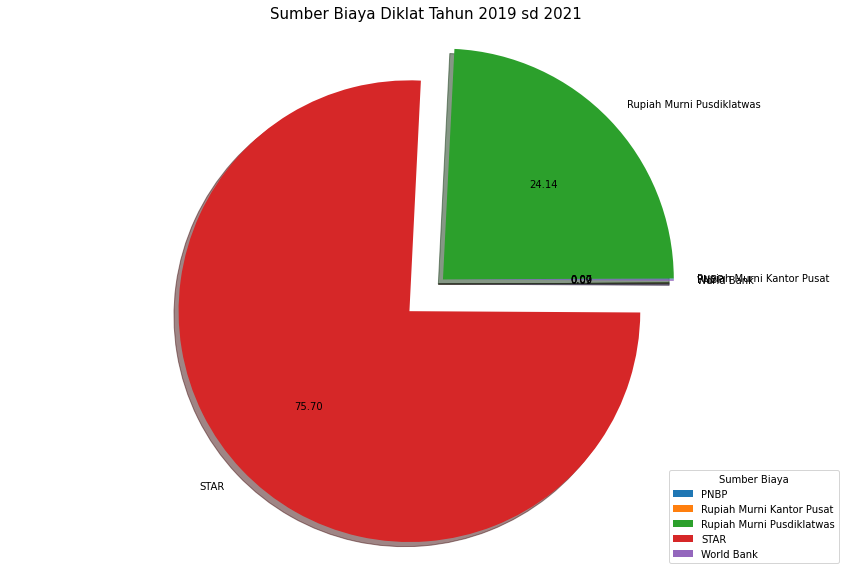

In [36]:
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw=dict(aspect="equal"))
plt.pie(df4['JumlahBiaya'], #jumlah data per bagian
        labels=df4['biayaName'], #label untuk tiap bagian
        autopct='%.2f', #memberi label nilai propirsi, dalam persen
        explode=(0,0,0,0.2,0), # memberi jarak antar slice, bisa dipakai untuk menonjolkan slice tertentu
        shadow='True'
       ) 
plt.axis('equal') #posisi poe chart ditengah canvas
plt.legend(loc='lower right', title='Sumber Biaya')
ax.set_title("Sumber Biaya Diklat Tahun 2019 sd 2021",size=15)
plt.show()

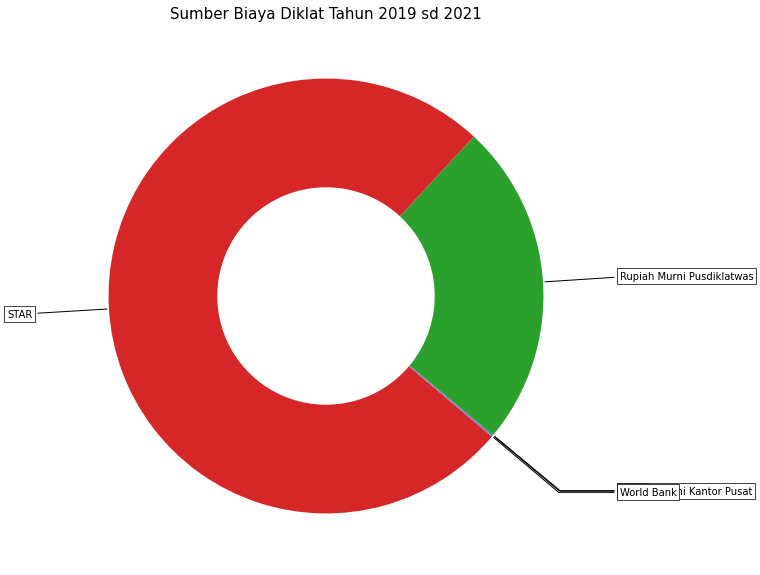

In [37]:
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw=dict(aspect="equal"))

recipe = df4['biayaName']
data = df4['JumlahBiaya']

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Sumber Biaya Diklat Tahun 2019 sd 2021",size=15)

plt.show()

In [38]:
dataPenugasan = pd.read_csv('data/kompetensi_penugasan-2021.csv')
dataPenugasan 

,nip,Akademi Kompetensi Umum,Akademi Tata Kelola Perekonimian dan Kemaritiman,Akademi Tata Kelola Polhukam PMK,Akademi Tata Kelola Pemerintahan Daerah dan Desa,Akademi Tata Kelola Koprorasi,Akademi Akuntansi Forensik dan Investigasi
0,195805141981011001,1,0,0,0,0,0
1,195907291980122001,16,0,0,0,1,0
2,195908071981121001,17,0,0,0,0,0
3,196004211985021001,13,0,0,0,0,0
4,196105051982092001,0,0,1,0,0,0
...,...,...,...,...,...,...,...
2505,199007072014021004,3,0,1,1,0,0
2506,199007072014032003,0,3,0,0,0,0
2507,199007082012101001,0,0,0,1,0,0
2508,199007082012101002,0,0,0,0,0,10


In [39]:
dataPenugasan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2510 entries, 0 to 2509
Data columns (total 7 columns):
 #   Column                                            Non-Null Count  Dtype
---  ------                                            --------------  -----
 0   nip                                               2510 non-null   int64
 1   Akademi Kompetensi Umum                           2510 non-null   int64
 2   Akademi Tata Kelola Perekonimian dan Kemaritiman  2510 non-null   int64
 3   Akademi Tata Kelola Polhukam PMK                  2510 non-null   int64
 4   Akademi Tata Kelola Pemerintahan Daerah dan Desa  2510 non-null   int64
 5   Akademi Tata Kelola Koprorasi                     2510 non-null   int64
 6   Akademi Akuntansi Forensik dan Investigasi        2510 non-null   int64
dtypes: int64(7)
memory usage: 137.4 KB


In [40]:
kf1=dataPenugasan.sum().drop('nip').reset_index()
kf1=kf1.rename(columns={'index':'akademi',0:'jumlah'})
kf1
# pd.DataFrame(kf1,columns=['akademi','total'])


,akademi,jumlah
0,Akademi Kompetensi Umum,2890
1,Akademi Tata Kelola Perekonimian dan Kemaritiman,2626
2,Akademi Tata Kelola Polhukam PMK,507
3,Akademi Tata Kelola Pemerintahan Daerah dan Desa,2326
4,Akademi Tata Kelola Koprorasi,2167
5,Akademi Akuntansi Forensik dan Investigasi,2214


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


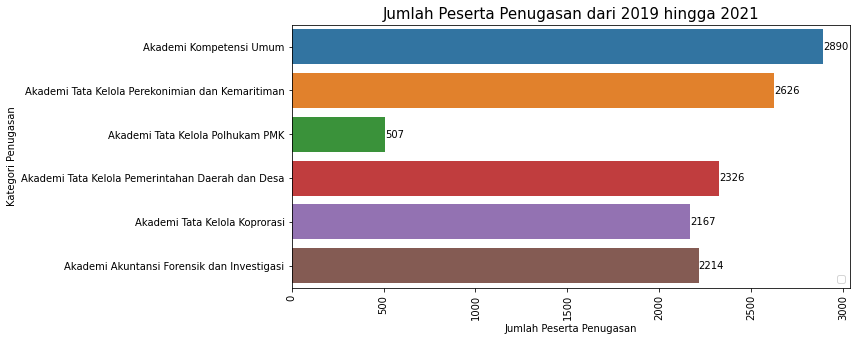

In [41]:
#1
plt.figure(figsize=(10,5))
ax=sns.barplot(y = kf1['akademi'],
            x = kf1['jumlah'],
            errwidth=0,
            data = kf1)
ax.bar_label(ax.containers[0])
plt.xticks(rotation='vertical')
plt.subplots_adjust(bottom = 0.15)

plt.legend(loc='lower right')
plt.title('Jumlah Peserta Penugasan dari 2019 hingga 2021', size=15)
plt.ylabel('Kategori Penugasan')
plt.xlabel('Jumlah Peserta Penugasan')
plt.show()

In [42]:
df_penugasan

,NIP,Judul Penugasan,Komptentsi,Kode_Kompetensi
0,195805141981011001,Rapat Monitoring dan Evaluasi Mingguan ke-3 Pe...,Akademi Kompetensi Umum,1
1,195907291980122001,Menghadiri ekspose PT Pupuk Indonesia (Pesero)...,Akademi Tata Kelola Koprorasi,5
2,195907291980122001,Rapat Evaluasi Penyelenggaraan Uji Kompetensi ...,Akademi Kompetensi Umum,1
3,195907291980122001,Rapat Persiapan Uji Makalah peserta Diklat CG...,Akademi Kompetensi Umum,1
4,195907291980122001,Melakukan Uji Makalah peserta Diklat CGCAE Bat...,Akademi Kompetensi Umum,1
...,...,...,...,...
12725,199007082012101002,mendampingi Sdri. Retno Dwijanti untuk memberi...,Akademi Akuntansi Forensik dan Investigasi,6
12726,199007082019022003,Kompilasi Hasil Audit Atas Pelaksanaan Vaksina...,Akademi Kompetensi Umum,1
12727,199007082019022003,Reviu Tata Kelola atas PSN pada Sertifikasi La...,Akademi Tata Kelola Perekonimian dan Kemaritiman,2
12728,199007082019022003,Reviu Tatakelola Proyek Strategis Nasional (PS...,Akademi Tata Kelola Perekonimian dan Kemaritiman,2


In [43]:
df_penugasan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12730 entries, 0 to 12729
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   NIP              12730 non-null  int64 
 1   Judul Penugasan  12730 non-null  object
 2   Komptentsi       12730 non-null  object
 3   Kode_Kompetensi  12730 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 397.9+ KB


In [44]:
df_penugasan.sort_values('Judul Penugasan', inplace=True)
df_penugasan_net=df_penugasan.drop_duplicates(subset='Judul Penugasan',
                     keep=False)
df_penugasan_net.head()

,NIP,Judul Penugasan,Komptentsi,Kode_Kompetensi
1896,196501241986031001,\r\nEvaluasi Perencanaan dan Penganggaran APBD...,Akademi Tata Kelola Pemerintahan Daerah dan Desa,4
9145,198704102014022003,\r\nPemberian Keterangan Ahli atas Dugaan Tind...,Akademi Akuntansi Forensik dan Investigasi,6
23,195908071981121001,\r\nMelaksanakan Penelaahan Makalah dan menja...,Akademi Kompetensi Umum,1
3095,196607071987031001,Asistensi Was Vaksinasi Polda - Limboto,Akademi Kompetensi Umum,1
9219,198705132014021001,Bimtek Penjaminan Kualitas Penilaian Maturita...,Akademi Tata Kelola Polhukam PMK,3


In [45]:
df_penugasan_net.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9379 entries, 1896 to 12470
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   NIP              9379 non-null   int64 
 1   Judul Penugasan  9379 non-null   object
 2   Komptentsi       9379 non-null   object
 3   Kode_Kompetensi  9379 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 366.4+ KB


In [46]:
df_penugasan_net = df_penugasan_net.rename(columns={'Komptentsi':'Kompetensi'})
# df_penugasan_net
df_penugasan_net1=df_penugasan_net.groupby(['Kompetensi']).agg({'Judul Penugasan':'count'}).reset_index()
df_penugasan_net1

,Kompetensi,Judul Penugasan
0,Akademi Akuntansi Forensik dan Investigasi,1816
1,Akademi Kompetensi Umum,1950
2,Akademi Tata Kelola Koprorasi,1642
3,Akademi Tata Kelola Pemerintahan Daerah dan Desa,1734
4,Akademi Tata Kelola Perekonimian dan Kemaritiman,1896
5,Akademi Tata Kelola Polhukam PMK,341


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


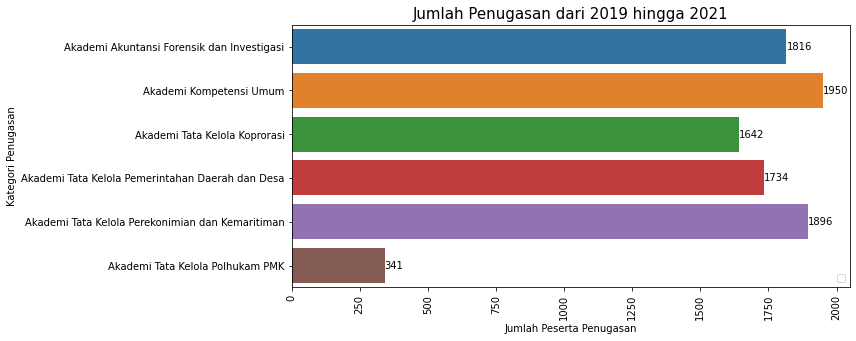

In [47]:
#1
plt.figure(figsize=(10,5))
ax=sns.barplot(y = df_penugasan_net1['Kompetensi'],
            x = df_penugasan_net1['Judul Penugasan'],
            errwidth=0,
            data = df_penugasan_net1)
ax.bar_label(ax.containers[0])
plt.xticks(rotation='vertical')
plt.subplots_adjust(bottom = 0.15)

plt.legend(loc='lower right')
plt.title('Jumlah Penugasan dari 2019 hingga 2021', size=15)
plt.ylabel('Kategori Penugasan')
plt.xlabel('Jumlah Peserta Penugasan')
plt.show()

Asumsi :
- Terdapat kemungkinan duplikasi Penugasan 

## Menghitung Jumlah Diklat dari Tahun 2019-2021

In [48]:
df_kompetensi_pesertadiklat.head()


,pesertaNIP,pesertaNama,jabatanID,jabatanFullName,UnitKerja_NamaUnitInstansi,Jumlah Diklat,Akademi Kompetensi Umum,Akademi Tata Kelola Perekonimian dan Kemaritiman,Akademi Tata Kelola Polhukam PMK,Akademi Tata Kelola Pemerintahan Daerah dan Desa,Akademi Tata Kelola Koprorasi,Akademi Akuntansi Forensik dan Investigasi
0,195904271979112001,Sri Waningsih,39,Auditor Madya,Pusat Penelitian dan Pengembangan Pengawasan,1,0,1,0,0,0,0
1,196001241981121001,Aneko Rusdandi W.,39,Auditor Madya,Deputi Bidang Pengawasan Instansi Pemerintah B...,1,0,1,0,0,0,0
2,196002171983021001,Khaerun,39,Auditor Madya,Perwakilan BPKP Provinsi Jawa Tengah,1,0,0,0,1,0,0
3,196006011986032001,Rahmatin Al Baroroh,39,Auditor Madya,Deputi Bidang Pengawasan Instansi Pemerintah B...,1,1,0,0,0,0,0
4,196006021982031001,Achmad Sujalma,38,Auditor Muda,Perwakilan BPKP Provinsi Jawa Barat,2,0,0,0,1,0,1


In [49]:
df_kompetensi_pesertadiklat.groupby('UnitKerja_NamaUnitInstansi')['Jumlah Diklat'].sum().reset_index().sort_values('Jumlah Diklat', ascending=False)

,UnitKerja_NamaUnitInstansi,Jumlah Diklat
3,Deputi Bidang Pengawasan Instansi Pemerintah B...,607
16,Perwakilan BPKP Provinsi Jawa Timur,512
15,Perwakilan BPKP Provinsi Jawa Tengah,508
5,Deputi Bidang Pengawasan Penyelenggaraan Keuan...,460
39,Perwakilan BPKP Provinsi Sumatera Utara,444
14,Perwakilan BPKP Provinsi Jawa Barat,435
33,Perwakilan BPKP Provinsi Sulawesi Selatan,416
1,Deputi Bidang Akuntan Negara,406
38,Perwakilan BPKP Provinsi Sumatera Selatan,363
7,Perwakilan BPKP Daerah Istimewa Yogyakarta,359


# Membandingkan Data Diklat dan Penugasan

## Data Kompetensi Penugasan

In [50]:
df_kompetensi_penugasan

,nip,Akademi Kompetensi Umum,Akademi Tata Kelola Perekonimian dan Kemaritiman,Akademi Tata Kelola Polhukam PMK,Akademi Tata Kelola Pemerintahan Daerah dan Desa,Akademi Tata Kelola Koprorasi,Akademi Akuntansi Forensik dan Investigasi
0,195805141981011001,1,0,0,0,0,0
1,195907291980122001,16,0,0,0,1,0
2,195908071981121001,17,0,0,0,0,0
3,196004211985021001,13,0,0,0,0,0
4,196105051982092001,0,0,1,0,0,0
...,...,...,...,...,...,...,...
2505,199007072014021004,3,0,1,1,0,0
2506,199007072014032003,0,3,0,0,0,0
2507,199007082012101001,0,0,0,1,0,0
2508,199007082012101002,0,0,0,0,0,10


In [51]:
df_penugasan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12730 entries, 76 to 12470
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   NIP              12730 non-null  int64 
 1   Judul Penugasan  12730 non-null  object
 2   Komptentsi       12730 non-null  object
 3   Kode_Kompetensi  12730 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 497.3+ KB


## Data Kompetensi Diklat

In [52]:
df_kompetensi_pesertadiklat

,pesertaNIP,pesertaNama,jabatanID,jabatanFullName,UnitKerja_NamaUnitInstansi,Jumlah Diklat,Akademi Kompetensi Umum,Akademi Tata Kelola Perekonimian dan Kemaritiman,Akademi Tata Kelola Polhukam PMK,Akademi Tata Kelola Pemerintahan Daerah dan Desa,Akademi Tata Kelola Koprorasi,Akademi Akuntansi Forensik dan Investigasi
0,195904271979112001,Sri Waningsih,39,Auditor Madya,Pusat Penelitian dan Pengembangan Pengawasan,1,0,1,0,0,0,0
1,196001241981121001,Aneko Rusdandi W.,39,Auditor Madya,Deputi Bidang Pengawasan Instansi Pemerintah B...,1,0,1,0,0,0,0
2,196002171983021001,Khaerun,39,Auditor Madya,Perwakilan BPKP Provinsi Jawa Tengah,1,0,0,0,1,0,0
3,196006011986032001,Rahmatin Al Baroroh,39,Auditor Madya,Deputi Bidang Pengawasan Instansi Pemerintah B...,1,1,0,0,0,0,0
4,196006021982031001,Achmad Sujalma,38,Auditor Muda,Perwakilan BPKP Provinsi Jawa Barat,2,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4103,199809132018121001,Rayhan Yuda Putra,36,Auditor Pelaksana,Perwakilan BPKP Provinsi Gorontalo,3,1,0,0,0,1,1
4104,199810132019122001,Ananda Nurizkina,36,Auditor Pelaksana,Perwakilan BPKP Provinsi Kepulauan Riau,1,0,0,0,0,1,0
4105,199905192019121001,Daniel Parulian Simanjuntak,36,Auditor Pelaksana,Perwakilan BPKP Provinsi Sulawesi Tenggara,1,0,0,0,0,1,0
4106,199912152019121001,Muhammad Gumelar Wiriaatmadja,36,Auditor Pelaksana,Perwakilan BPKP Provinsi Papua,2,0,0,0,1,1,0


In [53]:
df_kompetensi_pesertadiklat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4108 entries, 0 to 4107
Data columns (total 12 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   pesertaNIP                                        4108 non-null   int64 
 1   pesertaNama                                       4108 non-null   object
 2   jabatanID                                         4108 non-null   int64 
 3   jabatanFullName                                   4108 non-null   object
 4   UnitKerja_NamaUnitInstansi                        4108 non-null   object
 5   Jumlah Diklat                                     4108 non-null   int64 
 6   Akademi Kompetensi Umum                           4108 non-null   int64 
 7   Akademi Tata Kelola Perekonimian dan Kemaritiman  4108 non-null   int64 
 8   Akademi Tata Kelola Polhukam PMK                  4108 non-null   int64 
 9   Akademi Tata Kelola Pemerintah

Key penghubung antar data, terlihat aman yaitu nip dan pesertaNIP

## Mengubah nilai kompetensi di data diklat dan penugasan menjadi boolean

In [54]:
## Kompotensi Penugasan
df_kompetensi_penugasan['Akademi Kompetensi Umum'] = df_kompetensi_penugasan['Akademi Kompetensi Umum'].apply(lambda x: x>0, True, False)
df_kompetensi_penugasan['Akademi Tata Kelola Perekonimian dan Kemaritiman'] = df_kompetensi_penugasan['Akademi Tata Kelola Perekonimian dan Kemaritiman'].apply(lambda x: x>0, True, False)
df_kompetensi_penugasan['Akademi Tata Kelola Polhukam PMK'] = df_kompetensi_penugasan['Akademi Tata Kelola Polhukam PMK'].apply(lambda x: x>0, True, False)
df_kompetensi_penugasan['Akademi Tata Kelola Pemerintahan Daerah dan Desa'] = df_kompetensi_penugasan['Akademi Tata Kelola Pemerintahan Daerah dan Desa'].apply(lambda x: x>0, True, False)
df_kompetensi_penugasan['Akademi Tata Kelola Koprorasi'] = df_kompetensi_penugasan['Akademi Tata Kelola Koprorasi'].apply(lambda x: x>0, True, False)
df_kompetensi_penugasan['Akademi Akuntansi Forensik dan Investigasi'] = df_kompetensi_penugasan['Akademi Akuntansi Forensik dan Investigasi'].apply(lambda x: x>0, True, False)
df_kompetensi_penugasan.head()

,nip,Akademi Kompetensi Umum,Akademi Tata Kelola Perekonimian dan Kemaritiman,Akademi Tata Kelola Polhukam PMK,Akademi Tata Kelola Pemerintahan Daerah dan Desa,Akademi Tata Kelola Koprorasi,Akademi Akuntansi Forensik dan Investigasi
0,195805141981011001,True,False,False,False,False,False
1,195907291980122001,True,False,False,False,True,False
2,195908071981121001,True,False,False,False,False,False
3,196004211985021001,True,False,False,False,False,False
4,196105051982092001,False,False,True,False,False,False


In [55]:
## Kompetensi Peserta Diklat
df_kompetensi_pesertadiklat['Akademi Kompetensi Umum'] = df_kompetensi_pesertadiklat['Akademi Kompetensi Umum'].apply(lambda x: x>0, True, False)
df_kompetensi_pesertadiklat['Akademi Tata Kelola Perekonimian dan Kemaritiman'] = df_kompetensi_pesertadiklat['Akademi Tata Kelola Perekonimian dan Kemaritiman'].apply(lambda x: x>0, True, False)
df_kompetensi_pesertadiklat['Akademi Tata Kelola Polhukam PMK'] = df_kompetensi_pesertadiklat['Akademi Tata Kelola Polhukam PMK'].apply(lambda x: x>0, True, False)
df_kompetensi_pesertadiklat['Akademi Tata Kelola Pemerintahan Daerah dan Desa'] = df_kompetensi_pesertadiklat['Akademi Tata Kelola Pemerintahan Daerah dan Desa'].apply(lambda x: x>0, True, False)
df_kompetensi_pesertadiklat['Akademi Tata Kelola Koprorasi'] = df_kompetensi_pesertadiklat['Akademi Tata Kelola Koprorasi'].apply(lambda x: x>0, True, False)
df_kompetensi_pesertadiklat['Akademi Akuntansi Forensik dan Investigasi'] = df_kompetensi_pesertadiklat['Akademi Akuntansi Forensik dan Investigasi'].apply(lambda x: x>0, True, False)
df_kompetensi_pesertadiklat.head()

,pesertaNIP,pesertaNama,jabatanID,jabatanFullName,UnitKerja_NamaUnitInstansi,Jumlah Diklat,Akademi Kompetensi Umum,Akademi Tata Kelola Perekonimian dan Kemaritiman,Akademi Tata Kelola Polhukam PMK,Akademi Tata Kelola Pemerintahan Daerah dan Desa,Akademi Tata Kelola Koprorasi,Akademi Akuntansi Forensik dan Investigasi
0,195904271979112001,Sri Waningsih,39,Auditor Madya,Pusat Penelitian dan Pengembangan Pengawasan,1,False,True,False,False,False,False
1,196001241981121001,Aneko Rusdandi W.,39,Auditor Madya,Deputi Bidang Pengawasan Instansi Pemerintah B...,1,False,True,False,False,False,False
2,196002171983021001,Khaerun,39,Auditor Madya,Perwakilan BPKP Provinsi Jawa Tengah,1,False,False,False,True,False,False
3,196006011986032001,Rahmatin Al Baroroh,39,Auditor Madya,Deputi Bidang Pengawasan Instansi Pemerintah B...,1,True,False,False,False,False,False
4,196006021982031001,Achmad Sujalma,38,Auditor Muda,Perwakilan BPKP Provinsi Jawa Barat,2,False,False,False,True,False,True


## Menggabungkan data diklat dan data penugasan berdasarkan NIP

### *Merge Left*

In [56]:
df_gabungan_left=pd.merge(df_kompetensi_pesertadiklat,df_kompetensi_penugasan,left_on=['pesertaNIP'], right_on=['nip'], how='left')
df_gabungan_left

,pesertaNIP,pesertaNama,jabatanID,jabatanFullName,UnitKerja_NamaUnitInstansi,Jumlah Diklat,Akademi Kompetensi Umum_x,Akademi Tata Kelola Perekonimian dan Kemaritiman_x,Akademi Tata Kelola Polhukam PMK_x,Akademi Tata Kelola Pemerintahan Daerah dan Desa_x,Akademi Tata Kelola Koprorasi_x,Akademi Akuntansi Forensik dan Investigasi_x,nip,Akademi Kompetensi Umum_y,Akademi Tata Kelola Perekonimian dan Kemaritiman_y,Akademi Tata Kelola Polhukam PMK_y,Akademi Tata Kelola Pemerintahan Daerah dan Desa_y,Akademi Tata Kelola Koprorasi_y,Akademi Akuntansi Forensik dan Investigasi_y
0,195904271979112001,Sri Waningsih,39,Auditor Madya,Pusat Penelitian dan Pengembangan Pengawasan,1,False,True,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,196001241981121001,Aneko Rusdandi W.,39,Auditor Madya,Deputi Bidang Pengawasan Instansi Pemerintah B...,1,False,True,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,196002171983021001,Khaerun,39,Auditor Madya,Perwakilan BPKP Provinsi Jawa Tengah,1,False,False,False,True,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,196006011986032001,Rahmatin Al Baroroh,39,Auditor Madya,Deputi Bidang Pengawasan Instansi Pemerintah B...,1,True,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,196006021982031001,Achmad Sujalma,38,Auditor Muda,Perwakilan BPKP Provinsi Jawa Barat,2,False,False,False,True,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4103,199809132018121001,Rayhan Yuda Putra,36,Auditor Pelaksana,Perwakilan BPKP Provinsi Gorontalo,3,True,False,False,False,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4104,199810132019122001,Ananda Nurizkina,36,Auditor Pelaksana,Perwakilan BPKP Provinsi Kepulauan Riau,1,False,False,False,False,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4105,199905192019121001,Daniel Parulian Simanjuntak,36,Auditor Pelaksana,Perwakilan BPKP Provinsi Sulawesi Tenggara,1,False,False,False,False,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4106,199912152019121001,Muhammad Gumelar Wiriaatmadja,36,Auditor Pelaksana,Perwakilan BPKP Provinsi Papua,2,False,False,False,True,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
df_gabungan_left.isna().sum()

pesertaNIP                                               0
pesertaNama                                              0
jabatanID                                                0
jabatanFullName                                          0
UnitKerja_NamaUnitInstansi                               0
Jumlah Diklat                                            0
Akademi Kompetensi Umum_x                                0
Akademi Tata Kelola Perekonimian dan Kemaritiman_x       0
Akademi Tata Kelola Polhukam PMK_x                       0
Akademi Tata Kelola Pemerintahan Daerah dan Desa_x       0
Akademi Tata Kelola Koprorasi_x                          0
Akademi Akuntansi Forensik dan Investigasi_x             0
nip                                                   1668
Akademi Kompetensi Umum_y                             1668
Akademi Tata Kelola Perekonimian dan Kemaritiman_y    1668
Akademi Tata Kelola Polhukam PMK_y                    1668
Akademi Tata Kelola Pemerintahan Daerah dan Desa_y    16

Ada sekitar 1668 peserta diklat yang belum atau tidak mengajukan penugasan pengawasan pada dupaknya di tahun 2021

### *Merge Right*

In [58]:
df_gabungan_right=pd.merge(df_kompetensi_pesertadiklat,df_kompetensi_penugasan,left_on=['pesertaNIP'], right_on=['nip'],how='right')
df_gabungan_right

,pesertaNIP,pesertaNama,jabatanID,jabatanFullName,UnitKerja_NamaUnitInstansi,Jumlah Diklat,Akademi Kompetensi Umum_x,Akademi Tata Kelola Perekonimian dan Kemaritiman_x,Akademi Tata Kelola Polhukam PMK_x,Akademi Tata Kelola Pemerintahan Daerah dan Desa_x,Akademi Tata Kelola Koprorasi_x,Akademi Akuntansi Forensik dan Investigasi_x,nip,Akademi Kompetensi Umum_y,Akademi Tata Kelola Perekonimian dan Kemaritiman_y,Akademi Tata Kelola Polhukam PMK_y,Akademi Tata Kelola Pemerintahan Daerah dan Desa_y,Akademi Tata Kelola Koprorasi_y,Akademi Akuntansi Forensik dan Investigasi_y
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,195805141981011001,True,False,False,False,False,False
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,195907291980122001,True,False,False,False,True,False
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,195908071981121001,True,False,False,False,False,False
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,196004211985021001,True,False,False,False,False,False
4,1.961051e+17,Anna Dwiana Silitonga,39.0,Auditor Madya,Perwakilan BPKP Provinsi Daerah Khusus Ibukota...,2.0,False,False,False,True,False,True,196105051982092001,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2505,1.990071e+17,Adhitya Yudha Dwi Purnama,37.0,Auditor Pertama,Perwakilan BPKP Provinsi Nusa Tenggara Timur,3.0,False,False,False,True,True,True,199007072014021004,True,False,True,True,False,False
2506,1.990071e+17,Santi Ramadani,37.0,Auditor Pertama,Perwakilan BPKP Provinsi Sumatera Utara,2.0,False,False,False,False,True,True,199007072014032003,False,True,False,False,False,False
2507,1.990071e+17,Hamka Ridwan,37.0,Auditor Pertama,Perwakilan BPKP Provinsi Sulawesi Barat,3.0,False,False,False,True,True,True,199007082012101001,False,False,False,True,False,False
2508,1.990071e+17,Adri Nur Rasyadan,37.0,Auditor Pertama,Deputi Bidang Investigasi,5.0,True,False,False,False,True,True,199007082012101002,False,False,False,False,False,True


In [59]:
df_gabungan_right.isna().sum()

pesertaNIP                                            70
pesertaNama                                           70
jabatanID                                             70
jabatanFullName                                       70
UnitKerja_NamaUnitInstansi                            70
Jumlah Diklat                                         70
Akademi Kompetensi Umum_x                             70
Akademi Tata Kelola Perekonimian dan Kemaritiman_x    70
Akademi Tata Kelola Polhukam PMK_x                    70
Akademi Tata Kelola Pemerintahan Daerah dan Desa_x    70
Akademi Tata Kelola Koprorasi_x                       70
Akademi Akuntansi Forensik dan Investigasi_x          70
nip                                                    0
Akademi Kompetensi Umum_y                              0
Akademi Tata Kelola Perekonimian dan Kemaritiman_y     0
Akademi Tata Kelola Polhukam PMK_y                     0
Akademi Tata Kelola Pemerintahan Daerah dan Desa_y     0
Akademi Tata Kelola Koprorasi_y

Ada sekitar 70 Auditor yang telah mengajukan dupak yang tidak mengikuti diklat di tahun 2019-2021

### Gabungan

In [60]:
df_gabungan=pd.merge(df_kompetensi_pesertadiklat,df_kompetensi_penugasan,left_on=['pesertaNIP'], right_on=['nip'])
df_gabungan

,pesertaNIP,pesertaNama,jabatanID,jabatanFullName,UnitKerja_NamaUnitInstansi,Jumlah Diklat,Akademi Kompetensi Umum_x,Akademi Tata Kelola Perekonimian dan Kemaritiman_x,Akademi Tata Kelola Polhukam PMK_x,Akademi Tata Kelola Pemerintahan Daerah dan Desa_x,Akademi Tata Kelola Koprorasi_x,Akademi Akuntansi Forensik dan Investigasi_x,nip,Akademi Kompetensi Umum_y,Akademi Tata Kelola Perekonimian dan Kemaritiman_y,Akademi Tata Kelola Polhukam PMK_y,Akademi Tata Kelola Pemerintahan Daerah dan Desa_y,Akademi Tata Kelola Koprorasi_y,Akademi Akuntansi Forensik dan Investigasi_y
0,196105051982092001,Anna Dwiana Silitonga,39,Auditor Madya,Perwakilan BPKP Provinsi Daerah Khusus Ibukota...,2,False,False,False,True,False,True,196105051982092001,False,False,True,False,False,False
1,196106051987031002,Hariyanto Wahyu Djatmiko,39,Auditor Madya,Perwakilan BPKP Provinsi Jawa Timur,2,False,False,False,False,True,True,196106051987031002,False,True,False,False,False,False
2,196106121982031001,Yurizal Nazaroeddin,39,Auditor Madya,Perwakilan BPKP Provinsi Sumatera Barat,1,False,False,False,False,True,False,196106121982031001,False,False,False,True,False,False
3,196107161983021001,Yuli Kurnianto,39,Auditor Madya,Perwakilan BPKP Provinsi Jawa Tengah,1,False,False,False,False,True,False,196107161983021001,False,False,False,True,False,False
4,196107281982032001,Sofjani,39,Auditor Madya,Perwakilan BPKP Provinsi Daerah Khusus Ibukota...,1,False,False,False,False,True,False,196107281982032001,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2435,199007072014021004,Adhitya Yudha Dwi Purnama,37,Auditor Pertama,Perwakilan BPKP Provinsi Nusa Tenggara Timur,3,False,False,False,True,True,True,199007072014021004,True,False,True,True,False,False
2436,199007072014032003,Santi Ramadani,37,Auditor Pertama,Perwakilan BPKP Provinsi Sumatera Utara,2,False,False,False,False,True,True,199007072014032003,False,True,False,False,False,False
2437,199007082012101001,Hamka Ridwan,37,Auditor Pertama,Perwakilan BPKP Provinsi Sulawesi Barat,3,False,False,False,True,True,True,199007082012101001,False,False,False,True,False,False
2438,199007082012101002,Adri Nur Rasyadan,37,Auditor Pertama,Deputi Bidang Investigasi,5,True,False,False,False,True,True,199007082012101002,False,False,False,False,False,True


In [61]:
df_gabungan.isna().sum()

pesertaNIP                                            0
pesertaNama                                           0
jabatanID                                             0
jabatanFullName                                       0
UnitKerja_NamaUnitInstansi                            0
Jumlah Diklat                                         0
Akademi Kompetensi Umum_x                             0
Akademi Tata Kelola Perekonimian dan Kemaritiman_x    0
Akademi Tata Kelola Polhukam PMK_x                    0
Akademi Tata Kelola Pemerintahan Daerah dan Desa_x    0
Akademi Tata Kelola Koprorasi_x                       0
Akademi Akuntansi Forensik dan Investigasi_x          0
nip                                                   0
Akademi Kompetensi Umum_y                             0
Akademi Tata Kelola Perekonimian dan Kemaritiman_y    0
Akademi Tata Kelola Polhukam PMK_y                    0
Akademi Tata Kelola Pemerintahan Daerah dan Desa_y    0
Akademi Tata Kelola Koprorasi_y                 

Langkah selanjutnya kita perlu melakukan *compare data* dengan ketentuan sebagai berikut:
* x | y = Status
* 1 | 1 = Telah diklat dan penugasan 
* 1 | 0 = Telah diklat tetapi belum penugasan
* 0 | 1 = Perlu diklat
* 0 | 0 = Tidak ada

Disini kita akan membuat *function* yang akan mempermudah *compare data*

In [62]:
def check_kompetensi(kompetensi, penugasan):
    if(kompetensi & penugasan):
        return 'Telah diklat dan penugasan'
    if(kompetensi & ~penugasan):
        return 'Telah diklat tetapi belum penugasan'
    if(~kompetensi & penugasan):
        return 'Perlu diklat'
    if(~kompetensi & ~penugasan):
        return 'Tidak ada'

In [63]:
df_gabungan['kompetensi_1']=df_gabungan.apply(lambda x: check_kompetensi(x['Akademi Kompetensi Umum_x'],x['Akademi Kompetensi Umum_y']), axis=1)
df_gabungan['kompetensi_2']=df_gabungan.apply(lambda x: check_kompetensi(x['Akademi Tata Kelola Perekonimian dan Kemaritiman_x'],x['Akademi Tata Kelola Perekonimian dan Kemaritiman_y']), axis=1)
df_gabungan['kompetensi_3']=df_gabungan.apply(lambda x: check_kompetensi(x['Akademi Tata Kelola Polhukam PMK_x'],x['Akademi Tata Kelola Polhukam PMK_y']), axis=1)
df_gabungan['kompetensi_4']=df_gabungan.apply(lambda x: check_kompetensi(x['Akademi Tata Kelola Pemerintahan Daerah dan Desa_x'],x['Akademi Tata Kelola Pemerintahan Daerah dan Desa_y']), axis=1)
df_gabungan['kompetensi_5']=df_gabungan.apply(lambda x: check_kompetensi(x['Akademi Tata Kelola Koprorasi_x'],x['Akademi Tata Kelola Koprorasi_y']), axis=1)
df_gabungan['kompetensi_6']=df_gabungan.apply(lambda x: check_kompetensi(x['Akademi Akuntansi Forensik dan Investigasi_x'],x['Akademi Akuntansi Forensik dan Investigasi_y']), axis=1)

In [64]:
df_gabungan

,pesertaNIP,pesertaNama,jabatanID,jabatanFullName,UnitKerja_NamaUnitInstansi,Jumlah Diklat,Akademi Kompetensi Umum_x,Akademi Tata Kelola Perekonimian dan Kemaritiman_x,Akademi Tata Kelola Polhukam PMK_x,Akademi Tata Kelola Pemerintahan Daerah dan Desa_x,...,Akademi Tata Kelola Polhukam PMK_y,Akademi Tata Kelola Pemerintahan Daerah dan Desa_y,Akademi Tata Kelola Koprorasi_y,Akademi Akuntansi Forensik dan Investigasi_y,kompetensi_1,kompetensi_2,kompetensi_3,kompetensi_4,kompetensi_5,kompetensi_6
0,196105051982092001,Anna Dwiana Silitonga,39,Auditor Madya,Perwakilan BPKP Provinsi Daerah Khusus Ibukota...,2,False,False,False,True,...,True,False,False,False,Tidak ada,Tidak ada,Perlu diklat,Telah diklat tetapi belum penugasan,Tidak ada,Telah diklat tetapi belum penugasan
1,196106051987031002,Hariyanto Wahyu Djatmiko,39,Auditor Madya,Perwakilan BPKP Provinsi Jawa Timur,2,False,False,False,False,...,False,False,False,False,Tidak ada,Perlu diklat,Tidak ada,Tidak ada,Telah diklat tetapi belum penugasan,Telah diklat tetapi belum penugasan
2,196106121982031001,Yurizal Nazaroeddin,39,Auditor Madya,Perwakilan BPKP Provinsi Sumatera Barat,1,False,False,False,False,...,False,True,False,False,Tidak ada,Tidak ada,Tidak ada,Perlu diklat,Telah diklat tetapi belum penugasan,Tidak ada
3,196107161983021001,Yuli Kurnianto,39,Auditor Madya,Perwakilan BPKP Provinsi Jawa Tengah,1,False,False,False,False,...,False,True,False,False,Tidak ada,Tidak ada,Tidak ada,Perlu diklat,Telah diklat tetapi belum penugasan,Tidak ada
4,196107281982032001,Sofjani,39,Auditor Madya,Perwakilan BPKP Provinsi Daerah Khusus Ibukota...,1,False,False,False,False,...,False,False,False,False,Tidak ada,Perlu diklat,Tidak ada,Tidak ada,Telah diklat tetapi belum penugasan,Tidak ada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2435,199007072014021004,Adhitya Yudha Dwi Purnama,37,Auditor Pertama,Perwakilan BPKP Provinsi Nusa Tenggara Timur,3,False,False,False,True,...,True,True,False,False,Perlu diklat,Tidak ada,Perlu diklat,Telah diklat dan penugasan,Telah diklat tetapi belum penugasan,Telah diklat tetapi belum penugasan
2436,199007072014032003,Santi Ramadani,37,Auditor Pertama,Perwakilan BPKP Provinsi Sumatera Utara,2,False,False,False,False,...,False,False,False,False,Tidak ada,Perlu diklat,Tidak ada,Tidak ada,Telah diklat tetapi belum penugasan,Telah diklat tetapi belum penugasan
2437,199007082012101001,Hamka Ridwan,37,Auditor Pertama,Perwakilan BPKP Provinsi Sulawesi Barat,3,False,False,False,True,...,False,True,False,False,Tidak ada,Tidak ada,Tidak ada,Telah diklat dan penugasan,Telah diklat tetapi belum penugasan,Telah diklat tetapi belum penugasan
2438,199007082012101002,Adri Nur Rasyadan,37,Auditor Pertama,Deputi Bidang Investigasi,5,True,False,False,False,...,False,False,False,True,Telah diklat tetapi belum penugasan,Tidak ada,Tidak ada,Tidak ada,Telah diklat tetapi belum penugasan,Telah diklat dan penugasan


In [65]:
df_gabungan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2440 entries, 0 to 2439
Data columns (total 25 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   pesertaNIP                                          2440 non-null   int64 
 1   pesertaNama                                         2440 non-null   object
 2   jabatanID                                           2440 non-null   int64 
 3   jabatanFullName                                     2440 non-null   object
 4   UnitKerja_NamaUnitInstansi                          2440 non-null   object
 5   Jumlah Diklat                                       2440 non-null   int64 
 6   Akademi Kompetensi Umum_x                           2440 non-null   bool  
 7   Akademi Tata Kelola Perekonimian dan Kemaritiman_x  2440 non-null   bool  
 8   Akademi Tata Kelola Polhukam PMK_x                  2440 non-null   bool  
 9   Akademi 

In [66]:
## kita buat df baru dengan column yang perlu saja
df_kompetensi_compare= df_gabungan[['kompetensi_1','kompetensi_2','kompetensi_3','kompetensi_4','kompetensi_5','kompetensi_6']]
df_kompetensi_compare.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2440 entries, 0 to 2439
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   kompetensi_1  2440 non-null   object
 1   kompetensi_2  2440 non-null   object
 2   kompetensi_3  2440 non-null   object
 3   kompetensi_4  2440 non-null   object
 4   kompetensi_5  2440 non-null   object
 5   kompetensi_6  2440 non-null   object
dtypes: object(6)
memory usage: 133.4+ KB


Keterangan Data
* kompetensi_1 = Akademi Kompetensi Umum
* kompetensi_2 = Akademi Tata Kelola Perekonimian dan Kemaritiman
* kompetensi_3 = Akademi Tata Kelola Polhukam PMK
* kompetensi_4 = Akademi Tata Kelola Pemerintahan Daerah dan Desa
* kompetensi_5 = Akademi Tata Kelola Koprorasi
* kompetensi_6 = Akademi Akuntansi Forensik dan Investigasi

### Visualisasi data hasil *compare*
Tiap Kompetensi akan dibuat visualisasi masing-masing

#### Akademi Kompetensi Umum

In [67]:
df_kompetensi_compare['kompetensi_1'].value_counts()
# data "Tidak ada" akan di drop

Tidak ada                              1028
Telah diklat tetapi belum penugasan     562
Perlu diklat                            516
Telah diklat dan penugasan              334
Name: kompetensi_1, dtype: int64

In [68]:
df_k1= df_kompetensi_compare['kompetensi_1'].drop(df_kompetensi_compare[df_kompetensi_compare.kompetensi_1=='Tidak ada'].index)
df_k1= df_k1.value_counts().reset_index()
df_k1=df_k1.rename(columns={'index':'Keterangan','kompetensi_1':'Jumlah Pegawai'})
df_k1

,Keterangan,Jumlah Pegawai
0,Telah diklat tetapi belum penugasan,562
1,Perlu diklat,516
2,Telah diklat dan penugasan,334


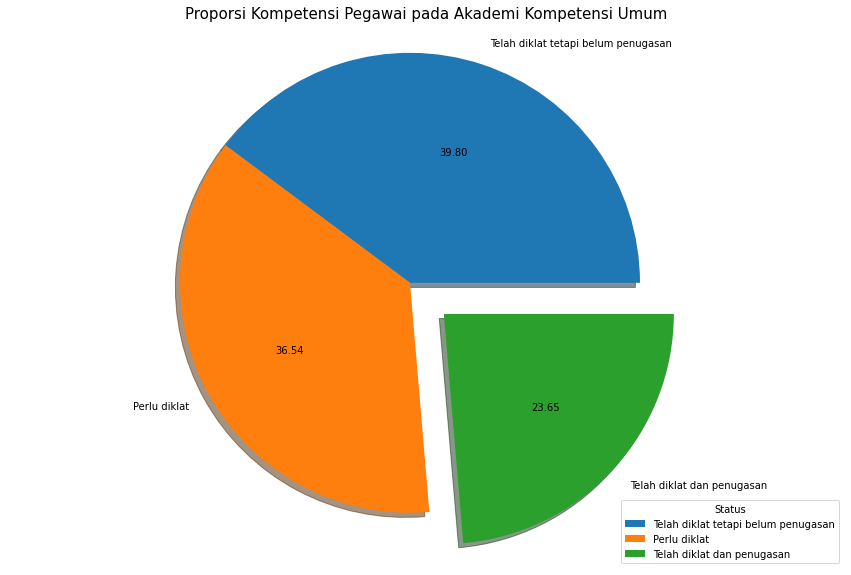

In [69]:
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw=dict(aspect="equal"))
plt.pie(df_k1['Jumlah Pegawai'], #jumlah data per bagian
        labels=df_k1['Keterangan'], #label untuk tiap bagian
        autopct='%.2f', #memberi label nilai propirsi, dalam persen
        explode=(0,0,0.2,), # memberi jarak antar slice, bisa dipakai untuk menonjolkan slice tertentu
        shadow='True'
       ) 
plt.axis('equal') #posisi poe chart ditengah canvas
plt.legend(loc='lower right', title='Status')
ax.set_title('Proporsi Kompetensi Pegawai pada Akademi Kompetensi Umum',size=15)
plt.show()

#### Akademi Tata Kelola Perekonimian dan Kemaritiman

In [70]:
df_kompetensi_compare['kompetensi_2'].value_counts()
# data "Tidak ada" akan di drop

Tidak ada                              1377
Perlu diklat                            808
Telah diklat dan penugasan              151
Telah diklat tetapi belum penugasan     104
Name: kompetensi_2, dtype: int64

In [71]:
df_k2= df_kompetensi_compare['kompetensi_2'].drop(df_kompetensi_compare[df_kompetensi_compare.kompetensi_2=='Tidak ada'].index)
df_k2= df_k2.value_counts().reset_index()
df_k2=df_k2.rename(columns={'index':'Keterangan','kompetensi_2':'Jumlah Pegawai'})
df_k2

,Keterangan,Jumlah Pegawai
0,Perlu diklat,808
1,Telah diklat dan penugasan,151
2,Telah diklat tetapi belum penugasan,104


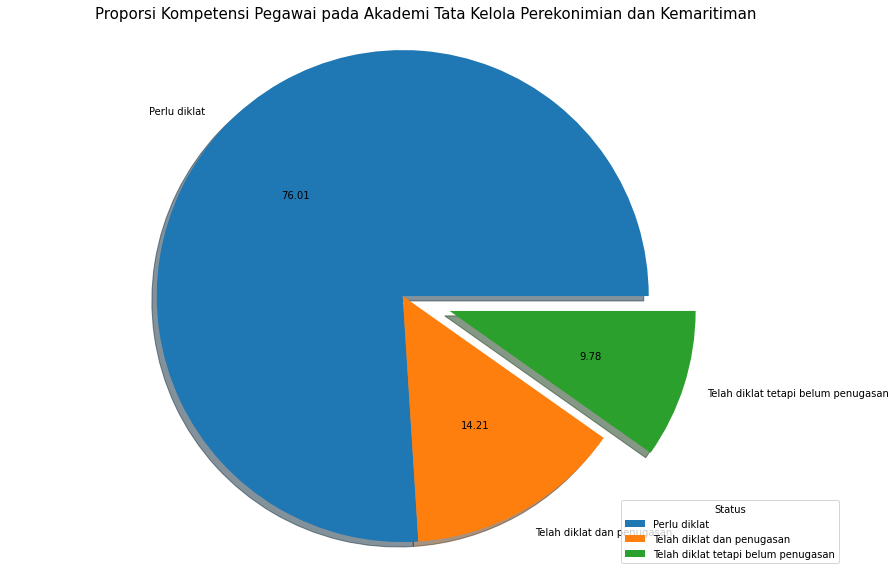

In [72]:
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw=dict(aspect="equal"))
plt.pie(df_k2['Jumlah Pegawai'], #jumlah data per bagian
        labels=df_k2['Keterangan'], #label untuk tiap bagian
        autopct='%.2f', #memberi label nilai propirsi, dalam persen
        explode=(0,0,0.2,), # memberi jarak antar slice, bisa dipakai untuk menonjolkan slice tertentu
        shadow='True'
       ) 
plt.axis('equal') #posisi poe chart ditengah canvas
plt.legend(loc='lower right', title='Status')
ax.set_title('Proporsi Kompetensi Pegawai pada Akademi Tata Kelola Perekonimian dan Kemaritiman',size=15)
plt.show()

#### Akademi Tata Kelola Polhukam PMK

In [73]:
df_kompetensi_compare['kompetensi_3'].value_counts()
# data "Tidak ada" akan di drop

Tidak ada                              2034
Perlu diklat                            271
Telah diklat tetapi belum penugasan      96
Telah diklat dan penugasan               39
Name: kompetensi_3, dtype: int64

In [74]:
df_k3= df_kompetensi_compare['kompetensi_3'].drop(df_kompetensi_compare[df_kompetensi_compare.kompetensi_3=='Tidak ada'].index)
df_k3= df_k3.value_counts().reset_index()
df_k3= df_k3.rename(columns={'index':'Keterangan','kompetensi_3':'Jumlah Pegawai'})
df_k3

,Keterangan,Jumlah Pegawai
0,Perlu diklat,271
1,Telah diklat tetapi belum penugasan,96
2,Telah diklat dan penugasan,39


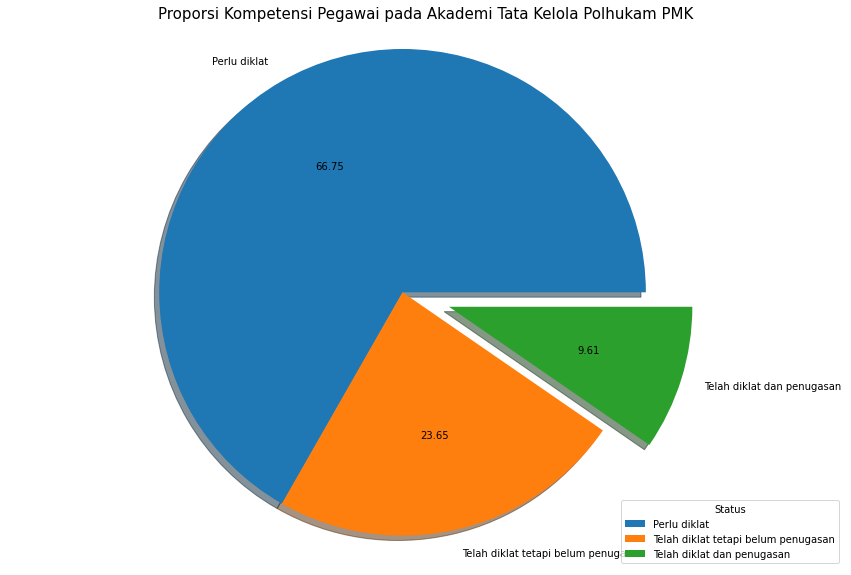

In [75]:
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw=dict(aspect="equal"))
plt.pie(df_k3['Jumlah Pegawai'], #jumlah data per bagian
        labels=df_k3['Keterangan'], #label untuk tiap bagian
        autopct='%.2f', #memberi label nilai propirsi, dalam persen
        explode=(0,0,0.2,), # memberi jarak antar slice, bisa dipakai untuk menonjolkan slice tertentu
        shadow='True'
       ) 
plt.axis('equal') #posisi poe chart ditengah canvas
plt.legend(loc='lower right', title='Status')
ax.set_title('Proporsi Kompetensi Pegawai pada Akademi Tata Kelola Polhukam PMK',size=15)
plt.show()

#### Akademi Tata Kelola Pemerintahan Daerah dan Desa

In [76]:
df_kompetensi_compare['kompetensi_4'].value_counts()
# data "Tidak ada" akan di drop

Tidak ada                              1576
Telah diklat dan penugasan              431
Telah diklat tetapi belum penugasan     218
Perlu diklat                            215
Name: kompetensi_4, dtype: int64

In [77]:
df_k4= df_kompetensi_compare['kompetensi_4'].drop(df_kompetensi_compare[df_kompetensi_compare.kompetensi_4=='Tidak ada'].index)
df_k4= df_k4.value_counts().reset_index()
df_k4= df_k4.rename(columns={'index':'Keterangan','kompetensi_4':'Jumlah Pegawai'})
df_k4

,Keterangan,Jumlah Pegawai
0,Telah diklat dan penugasan,431
1,Telah diklat tetapi belum penugasan,218
2,Perlu diklat,215


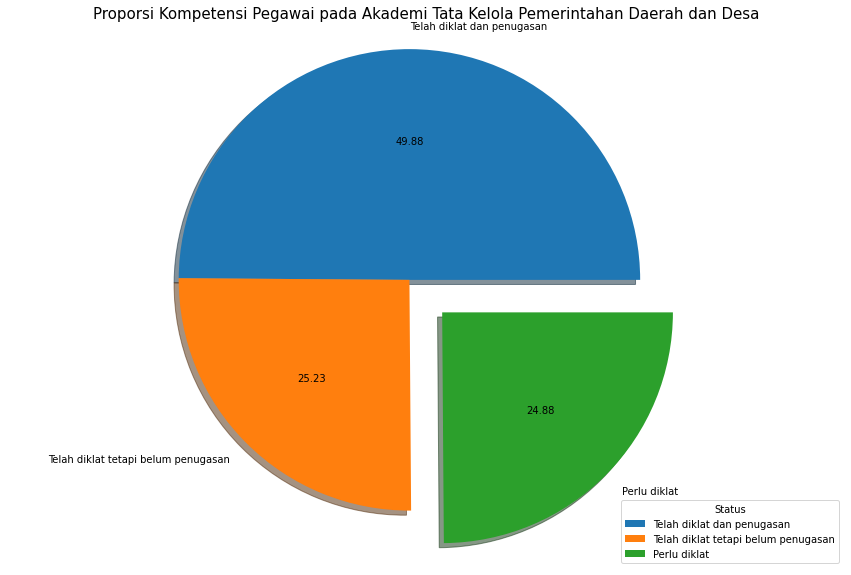

In [78]:
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw=dict(aspect="equal"))
plt.pie(df_k4['Jumlah Pegawai'], #jumlah data per bagian
        labels=df_k4['Keterangan'], #label untuk tiap bagian
        autopct='%.2f', #memberi label nilai propirsi, dalam persen
        explode=(0,0,0.2,), # memberi jarak antar slice, bisa dipakai untuk menonjolkan slice tertentu
        shadow='True'
       ) 
plt.axis('equal') #posisi poe chart ditengah canvas
plt.legend(loc='lower right', title='Status')
ax.set_title('Proporsi Kompetensi Pegawai pada Akademi Tata Kelola Pemerintahan Daerah dan Desa',size=15)
plt.show()

#### Akademi Tata Kelola Koprorasi

In [79]:
df_kompetensi_compare['kompetensi_5'].value_counts()
# data "Tidak ada" akan di drop

Telah diklat tetapi belum penugasan    1734
Telah diklat dan penugasan              585
Tidak ada                               107
Perlu diklat                             14
Name: kompetensi_5, dtype: int64

In [80]:
df_k5= df_kompetensi_compare['kompetensi_5'].drop(df_kompetensi_compare[df_kompetensi_compare.kompetensi_5=='Tidak ada'].index)
df_k5= df_k5.value_counts().reset_index()
df_k5= df_k5.rename(columns={'index':'Keterangan','kompetensi_5':'Jumlah Pegawai'})
df_k5

,Keterangan,Jumlah Pegawai
0,Telah diklat tetapi belum penugasan,1734
1,Telah diklat dan penugasan,585
2,Perlu diklat,14


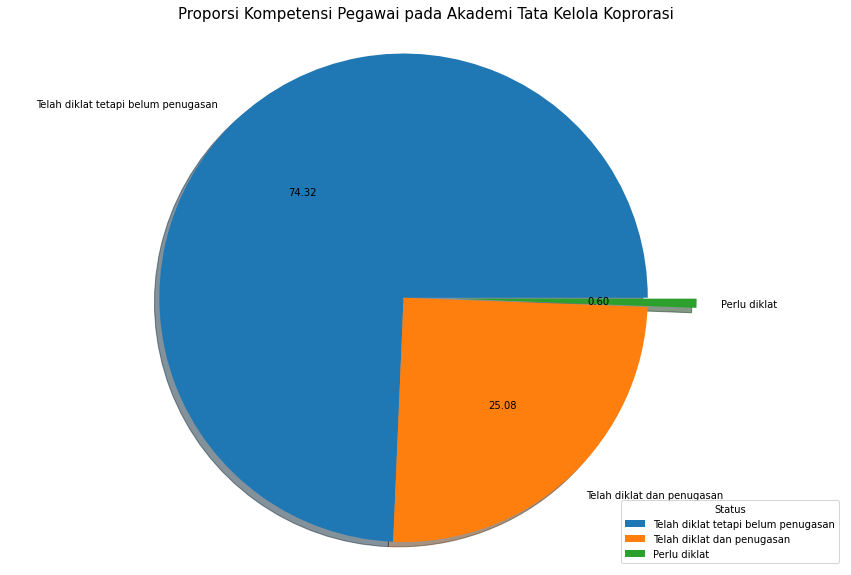

In [81]:
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw=dict(aspect="equal"))
plt.pie(df_k5['Jumlah Pegawai'], #jumlah data per bagian
        labels=df_k5['Keterangan'], #label untuk tiap bagian
        autopct='%.2f', #memberi label nilai propirsi, dalam persen
        explode=(0,0,0.2,), # memberi jarak antar slice, bisa dipakai untuk menonjolkan slice tertentu
        shadow='True'
       ) 
plt.axis('equal') #posisi poe chart ditengah canvas
plt.legend(loc='lower right', title='Status')
ax.set_title('Proporsi Kompetensi Pegawai pada Akademi Tata Kelola Koprorasi',size=15)
plt.show()

#### Akademi Akuntansi Forensik dan Investigasi

In [82]:
df_kompetensi_compare['kompetensi_6'].value_counts()
# data "Tidak ada" akan di drop

Telah diklat tetapi belum penugasan    1719
Telah diklat dan penugasan              384
Tidak ada                               316
Perlu diklat                             21
Name: kompetensi_6, dtype: int64

In [83]:
df_k6= df_kompetensi_compare['kompetensi_6'].drop(df_kompetensi_compare[df_kompetensi_compare.kompetensi_6=='Tidak ada'].index)
df_k6= df_k6.value_counts().reset_index()
df_k6= df_k6.rename(columns={'index':'Keterangan','kompetensi_6':'Jumlah Pegawai'})
df_k6

,Keterangan,Jumlah Pegawai
0,Telah diklat tetapi belum penugasan,1719
1,Telah diklat dan penugasan,384
2,Perlu diklat,21


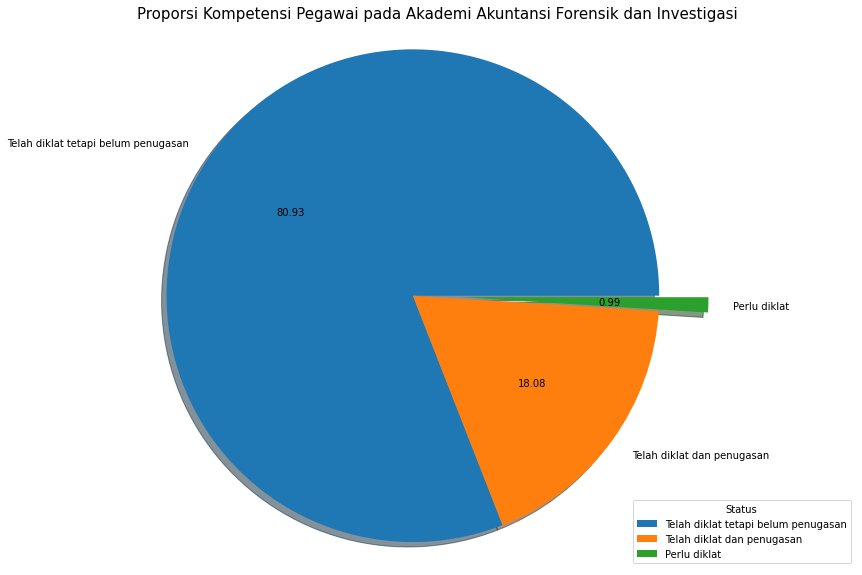

In [84]:
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw=dict(aspect="equal"))
plt.pie(df_k6['Jumlah Pegawai'], #jumlah data per bagian
        labels=df_k6['Keterangan'], #label untuk tiap bagian
        autopct='%.2f', #memberi label nilai propirsi, dalam persen
        explode=(0,0,0.2,), # memberi jarak antar slice, bisa dipakai untuk menonjolkan slice tertentu
        shadow='True'
       ) 
plt.axis('equal') #posisi poe chart ditengah canvas
plt.legend(loc='lower right', title='Status')
ax.set_title('Proporsi Kompetensi Pegawai pada Akademi Akuntansi Forensik dan Investigasi',size=15)
plt.show()

# Conclusion
Dari visualisasi atas data yang telah diolah dapat disampaikan bahwa:
* Jumlah peserta diklat dari tahun 2019 sampai dengan tahun 2021, terbanyak adalah Akademi Akuntansi Forensik dan Investigasi. Sedangkan untuk metode pelatihan yang digunakan adalah tipe 7, metode MOOC. Pelatihan dengan metode MOOC ini paling sedikit biaya pelatihannya namun dengan peserta terbanyak.
* Dari segi pembiayaan, dapat diketahui bahwa dari berbagai jenis pembiayaan, kegiatan pelatihan terbesar menggunakan dana STAR. Hal ini harus menjadi perhatian oleh pemangku kebijakan untuk keberlangsungan pendidikan dan pelatihan auditor.
* Dari keenam diklat kompetensi yang dilaksanakan, terlihat secara rata-rata masih belum dilaksanakannya penugasan yang sesuai dengan kompetensi yang diberikan


# Saran
Saran untuk pengembangan sistem:
* Data Peserta Diklat
    * Ditambahkan langsung kategori akademinya pada setiap referensi diklat
    * Mengurangi *missing value*
    * Masih terdapat referensi yang duplikat, perlu dibuat unik
* Data Penugasan/Dupak
    * Memisahkan butir kegiatan yang memiliki kompetensi yang berbeda agar mudah dianalis secara kompetensi
    * Menambahkan kategori akademinya pada butir kegiatan
    * Input uraian penugasan agar di kasih fungsi *clean* atau *trim* agar tidak banyak *whitespace* yang mengganggu proses analisis